In [1]:
from IPython.display import HTML
HTML('<style>div.text_cell_render{font-size:130%;}</style>')

In [2]:
%load_ext version_information
%version_information pandas

Software versions
Python 3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.7.0 x86_64 i386 64bit
pandas 0.23.4
Thu Jan 14 23:32:29 2021 EST

In [3]:
%load_ext watermark
%watermark -a "Alex Galea"  -v -p matplotlib,seaborn,pandas

Alex Galea 

CPython 3.6.8
IPython 7.2.0

matplotlib 3.0.2
seaborn 0.9.0
pandas 0.23.4


# Goalie Pull Bayes Optimize

 - Exploratory analysis

## Explore Parsed Goalie Pull Data

In [4]:
import pandas as pd
import numpy as np
import os
import re
import datetime
import time
import glob
from tqdm import tqdm_notebook
from colorama import Fore, Style

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['legend.fancybox'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Marion'

SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 14, 16, 20
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)

plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.labelpad'] = 20
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['xtick.minor.pad'] = 15
plt.rcParams['ytick.major.pad'] = 10
plt.rcParams['ytick.minor.pad'] = 10

# %config InlineBackend.figure_format='retina'
# sns.set() # Revert to matplotlib defaults
# plt.rcParams['figure.figsize'] = (12, 8)
# plt.style.use('fivethirtyeight')
# plt.rcParams['grid.alpha'] = 0.2
# plt.rcParams['axes.labelpad'] = 20
# plt.rcParams['ytick.labelsize'] = 14
# plt.rcParams['xtick.labelsize'] = 14
# plt.rcParams['axes.labelsize'] = 16
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['xtick.major.pad'] = 15
# plt.rcParams['xtick.minor.pad'] = 15
# plt.rcParams['ytick.major.pad'] = 10
# plt.rcParams['ytick.minor.pad'] = 10

def savefig(name):
    plt.savefig(f'../../figures/{name}.png', bbox_inches='tight', dpi=300)

In [7]:
# To debug UserWarning: findfont: Font family [‘Marion’] not found.

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# matplotlib.font_manager._rebuild()

In [8]:
ls ../../data/processed/

csv/ pkl/


In [9]:
ls ../../data/processed/pkl

20032004_goalie_pulls_2019-03-01.pkl  20122013_goalie_pulls_2019-04-25.pkl
20052006_goalie_pulls_2019-03-01.pkl  20132014_goalie_pulls_2019-04-25.pkl
20062007_goalie_pulls_2019-03-01.pkl  20142015_goalie_pulls_2019-04-25.pkl
20072008_goalie_pulls_2019-04-25.pkl  20152016_goalie_pulls_2019-04-25.pkl
20082009_goalie_pulls_2019-04-25.pkl  20162017_goalie_pulls_2019-04-25.pkl
20092010_goalie_pulls_2019-04-25.pkl  20172018_goalie_pulls_2019-04-25.pkl
20102011_goalie_pulls_2019-04-25.pkl  20182019_goalie_pulls_2019-04-25.pkl
20112012_goalie_pulls_2019-04-25.pkl  tmp/


In [10]:
files = sorted(glob.glob('../../data/processed/pkl/*'))
files

['../../data/processed/pkl/20032004_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20052006_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20062007_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20072008_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20082009_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20092010_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20102011_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20112012_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20122013_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20132014_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20142015_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20152016_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20162017_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20172018_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20182019_goalie_pulls_2019-04-25.pkl',
 '../../da

In [11]:
def load_data():
    files = [
        '../../data/processed/pkl/20032004_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20052006_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20062007_goalie_pulls_2019-03-01.pkl',
 '../../data/processed/pkl/20072008_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20082009_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20092010_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20102011_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20112012_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20122013_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20132014_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20142015_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20152016_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20162017_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20172018_goalie_pulls_2019-04-25.pkl',
 '../../data/processed/pkl/20182019_goalie_pulls_2019-04-25.pkl',
            ]
    return pd.concat((pd.read_pickle(f) for f in files), sort=False)

def clean_df(df):
    _df = df.copy()
    
    len_0 = _df.shape[0]
    print('Removing goal_for_time < 15 mins')
    _df = _df[~(_df.goal_for_time < datetime.timedelta(seconds=15*60))]
    print(f'Removed {len_0 - _df.shape[0]} total rows')
    
    if 'game_end_time' in df.columns:
        len_0 = _df.shape[0]
        print('Removing game_end_time < 15 mins')
        _df = _df[~(_df.game_end_time < datetime.timedelta(seconds=60*15))]
        print(f'Removed {len_0 - _df.shape[0]} total rows')
    
    return _df

In [12]:
df = load_data()
df = clean_df(df)

Removing goal_for_time < 15 mins
Removed 115 total rows
Removing game_end_time < 15 mins
Removed 0 total rows


In [13]:
# Label the outcomes
df['label'] = ''
label_masks = {
    'goal_for': ~(df.goal_for_time.isnull()),
    'goal_against': ~(df.goal_against_time.isnull()),
    'no_goals': ~(df.game_end_timedelta.isnull()),   
}
for label, mask in label_masks.items():
    df.loc[mask, 'label'] = label
df.loc[df.label == '', 'label'] = float('nan')
df.label.isnull().sum()

0

In [14]:
df.head()

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time,label
0,20032004,710,CHI,2004-01-21,3,00:19:44,NaT,00:19:47,NaT,00:00:03,NaT,NaT,goal_against
1,20032004,205,MIN,2003-11-08,3,00:19:58,NaT,NaT,NaT,NaT,00:00:02,NaT,no_goals
2,20032004,1230,S.J,2004-04-04,3,00:18:39,00:19:40,NaT,00:01:01,NaT,NaT,NaT,goal_for
3,20032004,655,PHX,2004-01-13,3,00:19:03,NaT,00:19:25,NaT,00:00:22,NaT,NaT,goal_against
4,20032004,985,PHX,2004-03-02,3,00:18:34,00:18:44,NaT,00:00:10,NaT,NaT,NaT,goal_for


In [15]:
df.tail()

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time,label
901,20182019,1265,WSH,2019-04-06,3,00:16:40,NaT,00:17:27,NaT,00:00:47,NaT,NaT,goal_against
902,20182019,1266,CHI,2019-04-06,3,00:17:39,NaT,00:17:51,NaT,00:00:12,NaT,NaT,goal_against
903,20182019,1268,CGY,2019-04-06,3,00:19:34,NaT,NaT,NaT,NaT,00:00:26,00:20:00,no_goals
904,20182019,1270,VGK,2019-04-06,3,00:18:37.500000,NaT,00:19:05,NaT,00:00:27.500000,NaT,NaT,goal_against
905,20182019,1271,COL,2019-04-06,3,00:17:07,NaT,00:19:15,NaT,00:02:08,NaT,NaT,goal_against


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pull_period,11168,3,0,3,3,3,3,3
pull_time,11168,0 days 00:18:32.484195,0 days 00:00:52.298570,0 days 00:07:13,0 days 00:18:10,0 days 00:18:40,0 days 00:19:05.500000,0 days 00:19:59.500000
goal_for_time,1496,0 days 00:18:58.131684,0 days 00:00:50.558413,0 days 00:15:10,0 days 00:18:35,0 days 00:19:07.500000,0 days 00:19:35,0 days 00:19:59
goal_against_time,3736,0 days 00:19:02.648019,0 days 00:00:54.536523,0 days 00:08:14,0 days 00:18:43.750000,0 days 00:19:15,0 days 00:19:38,0 days 00:19:59
goal_for_timedelta,1496,0 days 00:00:45.730614,0 days 00:00:34.889763,0 days 00:00:00,0 days 00:00:19.500000,0 days 00:00:39,0 days 00:01:03,0 days 00:04:06
goal_against_timedelta,3736,0 days 00:00:48.343549,0 days 00:00:35.784661,0 days 00:00:00,0 days 00:00:21.500000,0 days 00:00:40,0 days 00:01:06.500000,0 days 00:04:51
game_end_timedelta,5937,0 days 00:01:11.010948,0 days 00:00:41.067886,0 days 00:00:00.500000,0 days 00:00:42.500000,0 days 00:01:07,0 days 00:01:32,0 days 00:05:22.500000
game_end_time,4632,0 days 00:20:00,0 days 00:00:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00


In [17]:
df.dtypes

season                             object
game_number                        object
team_name                          object
date                       datetime64[ns]
pull_period                         int64
pull_time                 timedelta64[ns]
goal_for_time             timedelta64[ns]
goal_against_time         timedelta64[ns]
goal_for_timedelta        timedelta64[ns]
goal_against_timedelta    timedelta64[ns]
game_end_timedelta        timedelta64[ns]
game_end_time             timedelta64[ns]
label                              object
dtype: object

In [18]:
df.isnull().sum() / df.shape[0]

season                    0.000000
game_number               0.000000
team_name                 0.000000
date                      0.000090
pull_period               0.000000
pull_time                 0.000000
goal_for_time             0.866046
goal_against_time         0.665473
goal_for_timedelta        0.866046
goal_against_timedelta    0.665473
game_end_timedelta        0.468392
game_end_time             0.585244
label                     0.000000
dtype: float64

In [19]:
df.columns

Index(['season', 'game_number', 'team_name', 'date', 'pull_period',
       'pull_time', 'goal_for_time', 'goal_against_time', 'goal_for_timedelta',
       'goal_against_timedelta', 'game_end_timedelta', 'game_end_time',
       'label'],
      dtype='object')

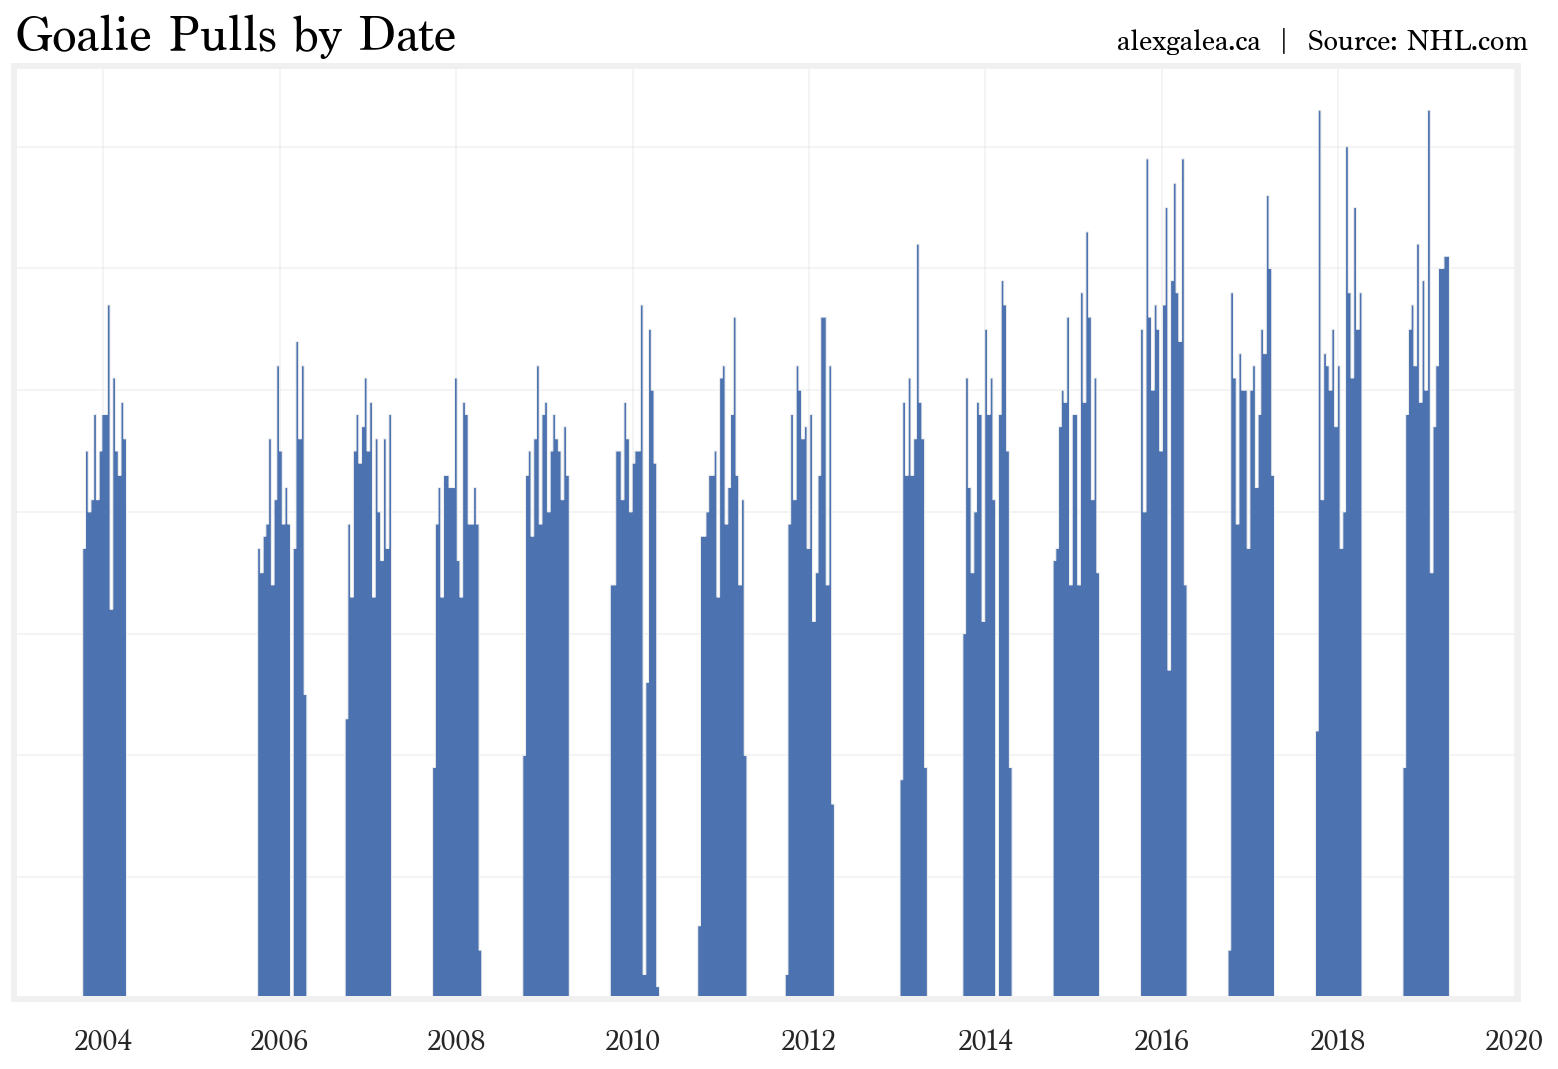

In [49]:
df.date.hist(
    color='b',
    bins=500,
    histtype='stepfilled')

ax = plt.gca()
ax.set_yticklabels([])

plt.text(x='2003', y=78,
    s='Goalie Pulls by Date',
    fontsize=24, color='black', weight='bold')

plt.text(x='2015-07', y=78,
    s='alexgalea.ca  |  Source: NHL.com',
    fontsize=14, color='black', style='italic')

savefig('goalie_pulls_2003-2019')

In [21]:
df.groupby('season').size().sort_index(ascending=True).rename('counts').reset_index()

,season,counts
0,20032004,716
1,20052006,702
2,20062007,710
3,20072008,683
4,20082009,735
5,20092010,703
6,20102011,712
7,20112012,733
8,20122013,426
9,20132014,749


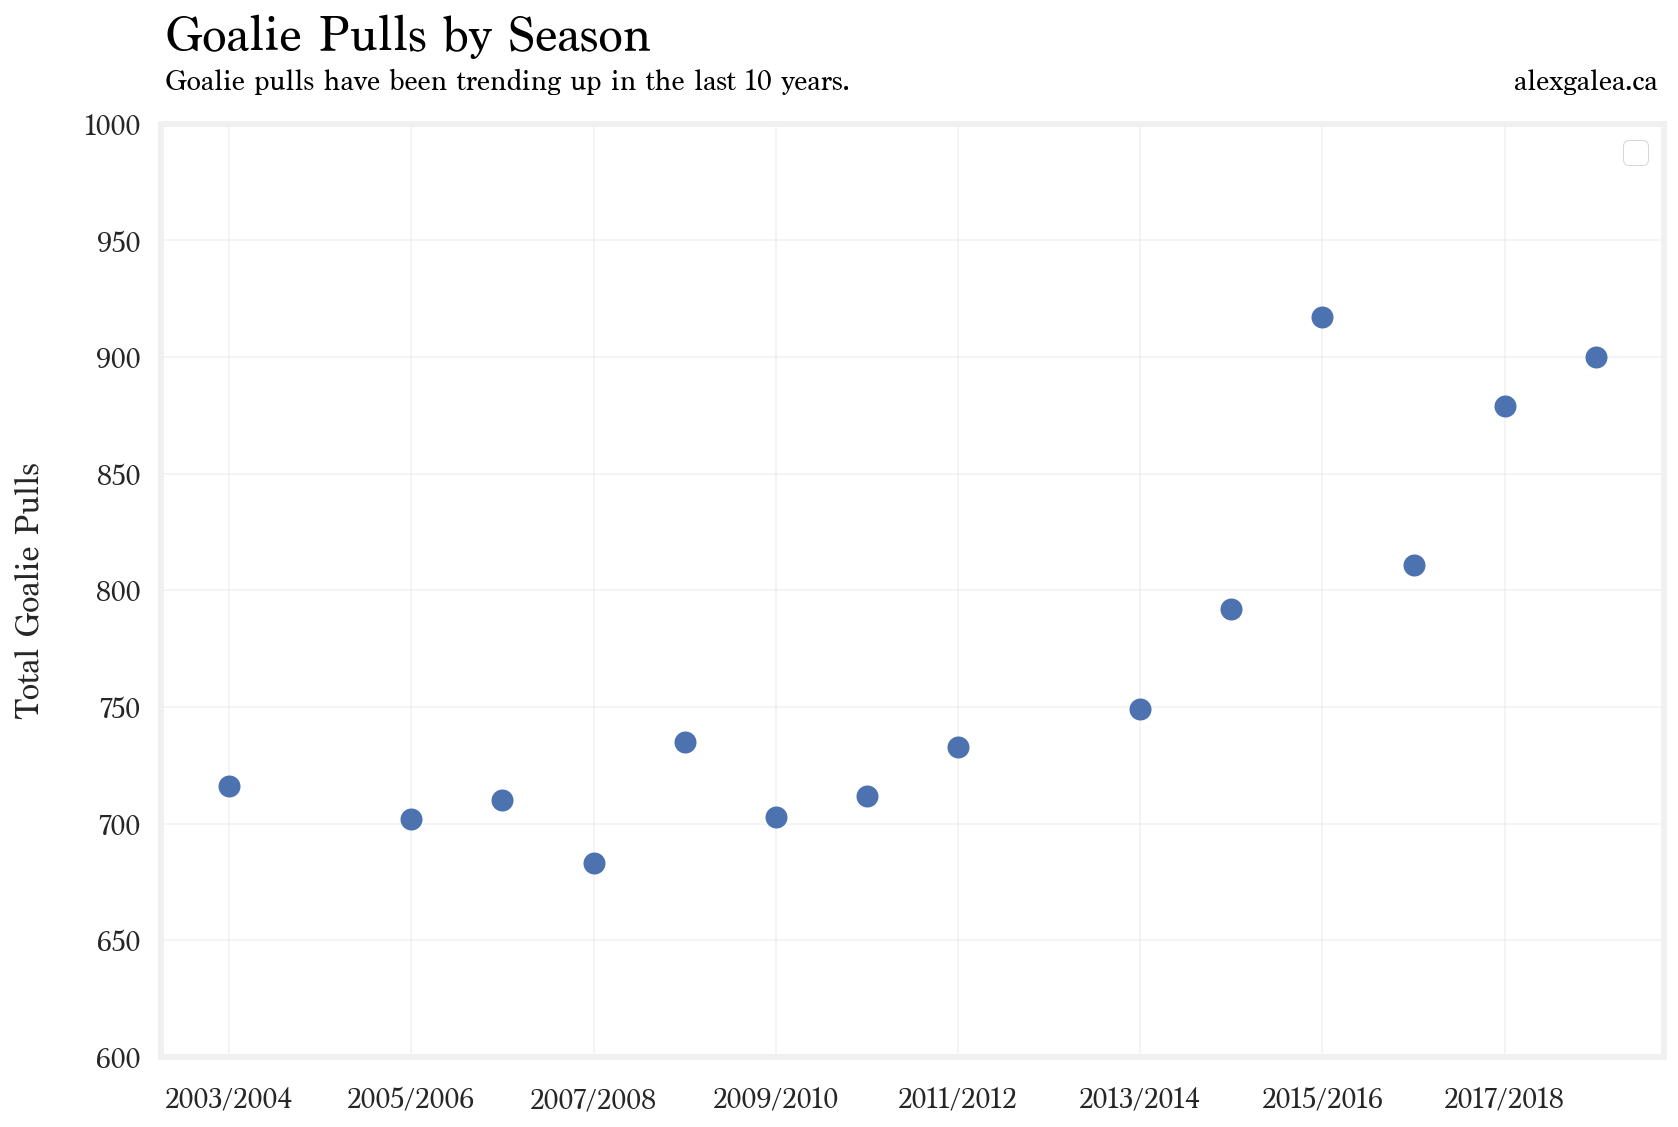

In [65]:
fig, ax = plt.subplots()

# Calculate number of pulls per season
s = df.groupby('season').size().sort_index(ascending=True).rename('counts').reset_index()

# Add data for the missing season
s = (s.append({'season': '20042005', 'counts': 0}, ignore_index=True)
    .sort_values('season', ascending=True).reset_index(drop=True))

s.plot(marker='o', lw=0, ax=ax, color='b', ms=10)
ax.set_ylim(600, 1000)
plt.legend([])
plt.ylabel('Total Goalie Pulls')

# Assign tick names
label_map = {str(i): s for i, s in enumerate(s.season.tolist())}
fig.canvas.draw()
labels = [lab.get_text() for lab in ax.get_xticklabels()]
season_label = lambda x: '{}/{}'.format(x[:4], x[4:])

ax.set_xticklabels(
    [season_label(label_map.get(lab, ''))
    for lab in labels]
)

plt.text(x=-0.7, y=1032,
    s='Goalie Pulls by Season',
    fontsize=24, color='black', weight='bold')

plt.text(x=-0.7, y=1015,
    s='Goalie pulls have been trending up in the last 10 years.',
    fontsize=14, color='black', style='italic')

plt.text(x=14.1, y=1015,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('goalie_pulls_by_season')

Plot goalie pulls per season

In [34]:
games_per_season = {}
for folder in sorted(glob.glob('../../data/raw/html/*')):
    files = glob.glob(os.path.join(folder, '*.html'))
    print(folder, len(files))
    games_per_season[os.path.split(folder)[-1]] = len(files)

../../data/raw/html/20032004 1230
../../data/raw/html/20042005 0
../../data/raw/html/20052006 1228
../../data/raw/html/20062007 1230
../../data/raw/html/20072008 1230
../../data/raw/html/20082009 1230
../../data/raw/html/20092010 1230
../../data/raw/html/20102011 1230
../../data/raw/html/20112012 1230
../../data/raw/html/20122013 720
../../data/raw/html/20132014 1230
../../data/raw/html/20142015 1230
../../data/raw/html/20152016 1230
../../data/raw/html/20162017 1230
../../data/raw/html/20172018 1271
../../data/raw/html/20182019 1271


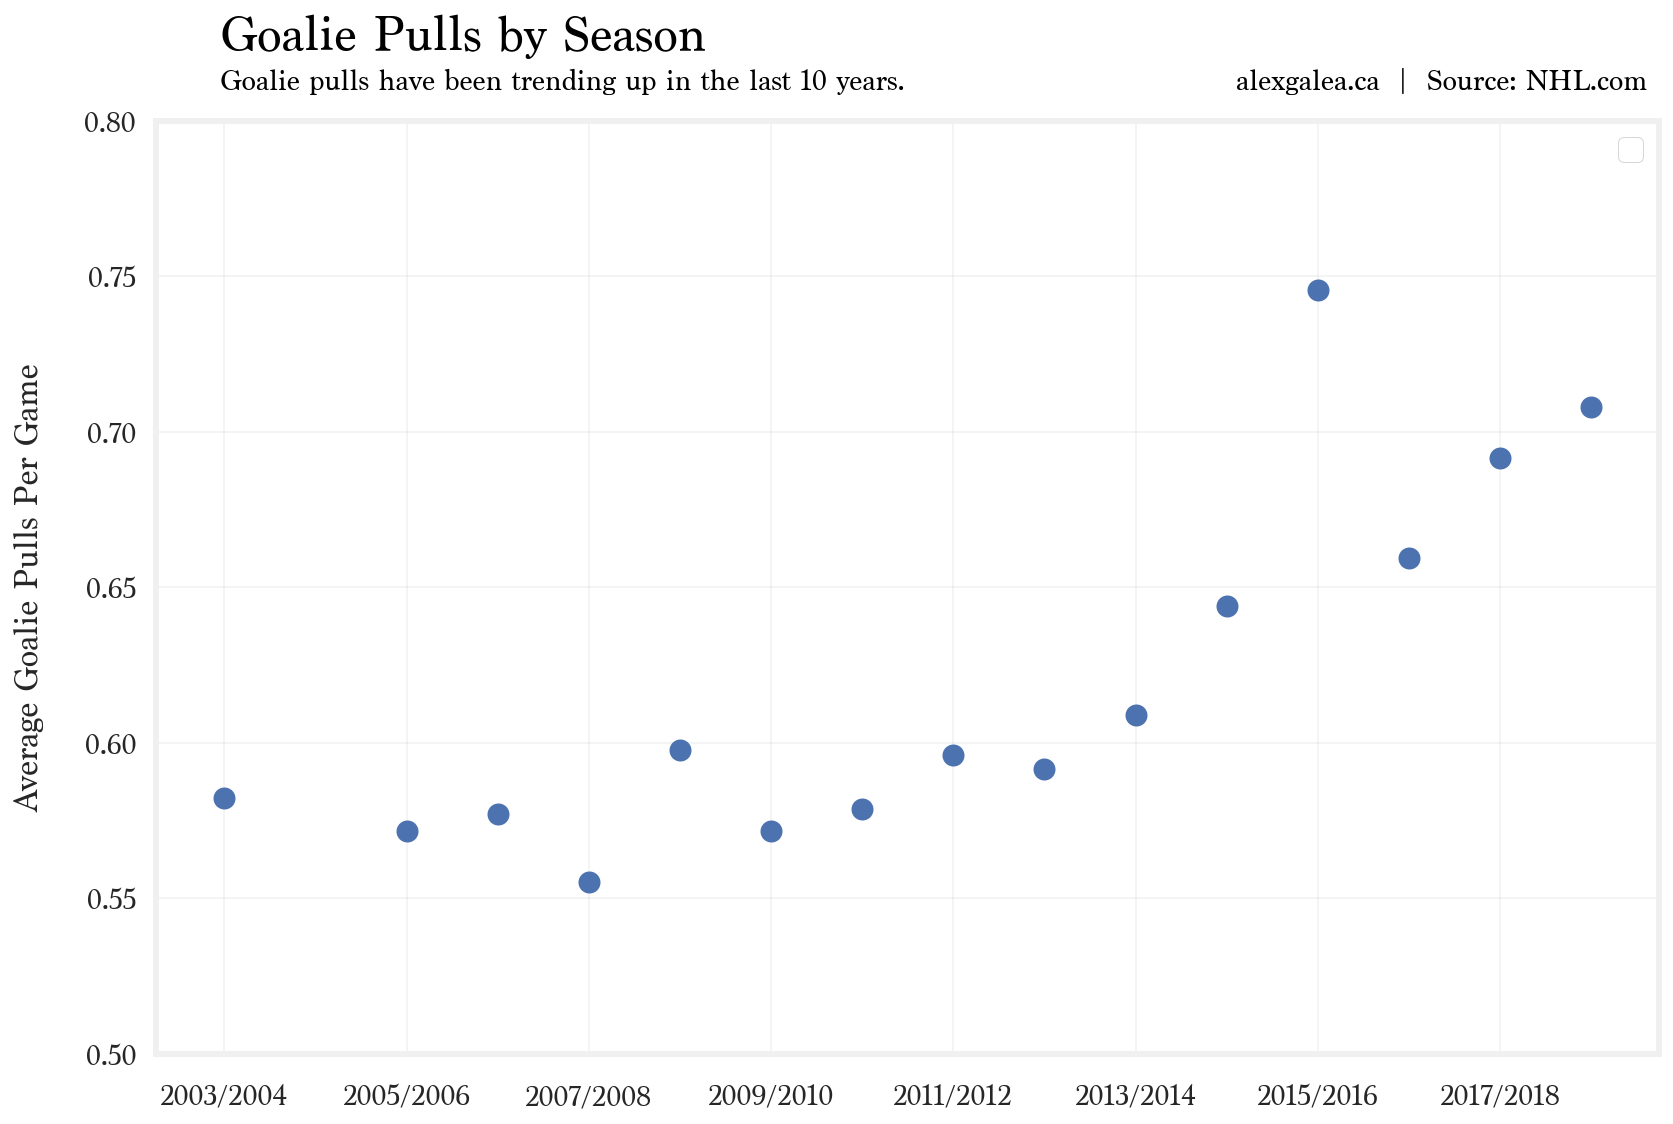

In [47]:
s['counts_per_game'] = s.season.map(games_per_season)

fig, ax = plt.subplots()

# Calculate number of pulls per season
s = df.groupby('season').size().sort_index(ascending=True).rename('counts').reset_index()

# Add data for the missing season
s = (s.append({'season': '20042005', 'counts': 0}, ignore_index=True)
    .sort_values('season', ascending=True).reset_index(drop=True))

# Convert to counts per game
s['games'] = s['season'].apply(lambda x: games_per_season.get(x, 0))
s['counts'] = (s['counts'] / s['games']).fillna(0)

s.plot(marker='o', lw=0, ax=ax, color='b', ms=10)
ax.set_ylim(0.5, 0.8)
plt.legend([])
plt.ylabel('Average Goalie Pulls Per Game')

# Assign tick names
label_map = {str(i): s for i, s in enumerate(s.season.tolist())}
fig.canvas.draw()
labels = [lab.get_text() for lab in ax.get_xticklabels()]
season_label = lambda x: '{}/{}'.format(x[:4], x[4:])

ax.set_xticklabels(
    [season_label(label_map.get(lab, ''))
    for lab in labels]
)


plt.text(x=-0.05, y=0.823,
    s='Goalie Pulls by Season',
    fontsize=24, color='black', weight='bold')

plt.text(x=-0.05, y=0.81,
    s='Goalie pulls have been trending up in the last 10 years.',
    fontsize=14, color='black', style='italic')

plt.text(x=11.1, y=0.81,
    s='alexgalea.ca  |  Source: NHL.com',
    fontsize=14, color='black', style='italic')


savefig('goalie_pulls_per_game_by_season')

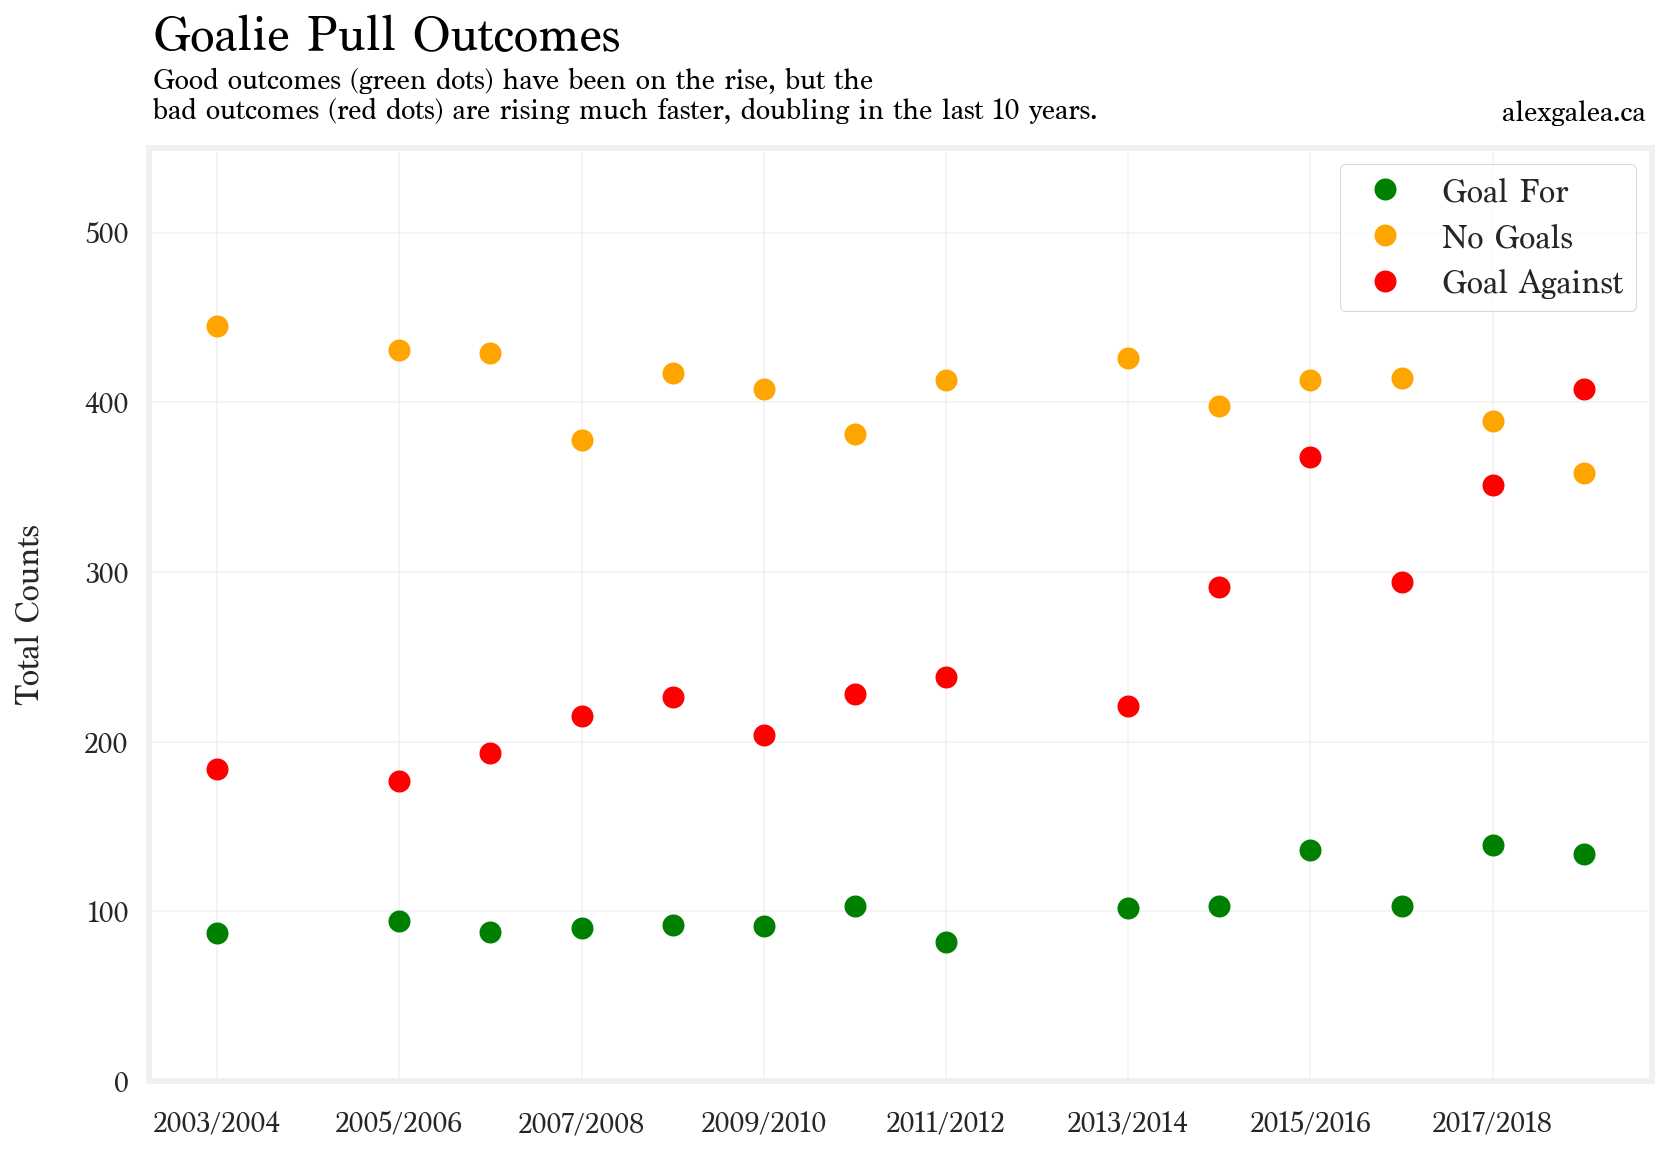

In [66]:
fig, ax = plt.subplots()
iterables = zip(['green', 'orange', 'red'],
                ['goal_for', 'no_goals', 'goal_against'])

legend_map = {
    'no_goals': 'No Goals',
    'goal_against': 'Goal Against',
    'goal_for': 'Goal For'
}

axes = []
for c, label in iterables:
    m = df.label==label
    
    # Calculate the counts
    s = (df[m].groupby('season').size()
         .sort_index(ascending=True)
         .rename(legend_map[label]).reset_index())
    
    # Add data for the missing season
    s = (s.append({'season': '20042005', legend_map[label]: -999}, ignore_index=True)
        .sort_values('season', ascending=True).reset_index(drop=True))
    
    s.loc[s.season == '20122013', legend_map[label]] = -999
    s.plot(marker='o', lw=0, ax=ax, ms=10, color=c, label=legend_map[label])
    plt.legend()

# ax.set_xticklabels(s.season.tolist());
ax.set_ylim(0, 550)
plt.ylabel('Total Counts')

# Assign tick names
label_map = {str(i): s for i, s in enumerate(s.season.tolist())}
fig.canvas.draw()
labels = [lab.get_text() for lab in ax.get_xticklabels()]
season_label = lambda x: '{}/{}'.format(x[:4], x[4:])

ax.set_xticklabels(
    [season_label(label_map.get(lab, ''))
    for lab in labels]
)

plt.text(x=-0.7, y=608,
    s='Goalie Pull Outcomes',
    fontsize=24, color='black', weight='bold')

plt.text(x=-0.7, y=567,
    s='Good outcomes (green dots) have been on the rise, but the\nbad outcomes (red dots) are rising much faster, doubling in the last 10 years.',
    fontsize=14, color='black', style='italic')

plt.text(x=14.1, y=566,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('goalie_pull_outcomes_by_season')

Plot average pull time by season

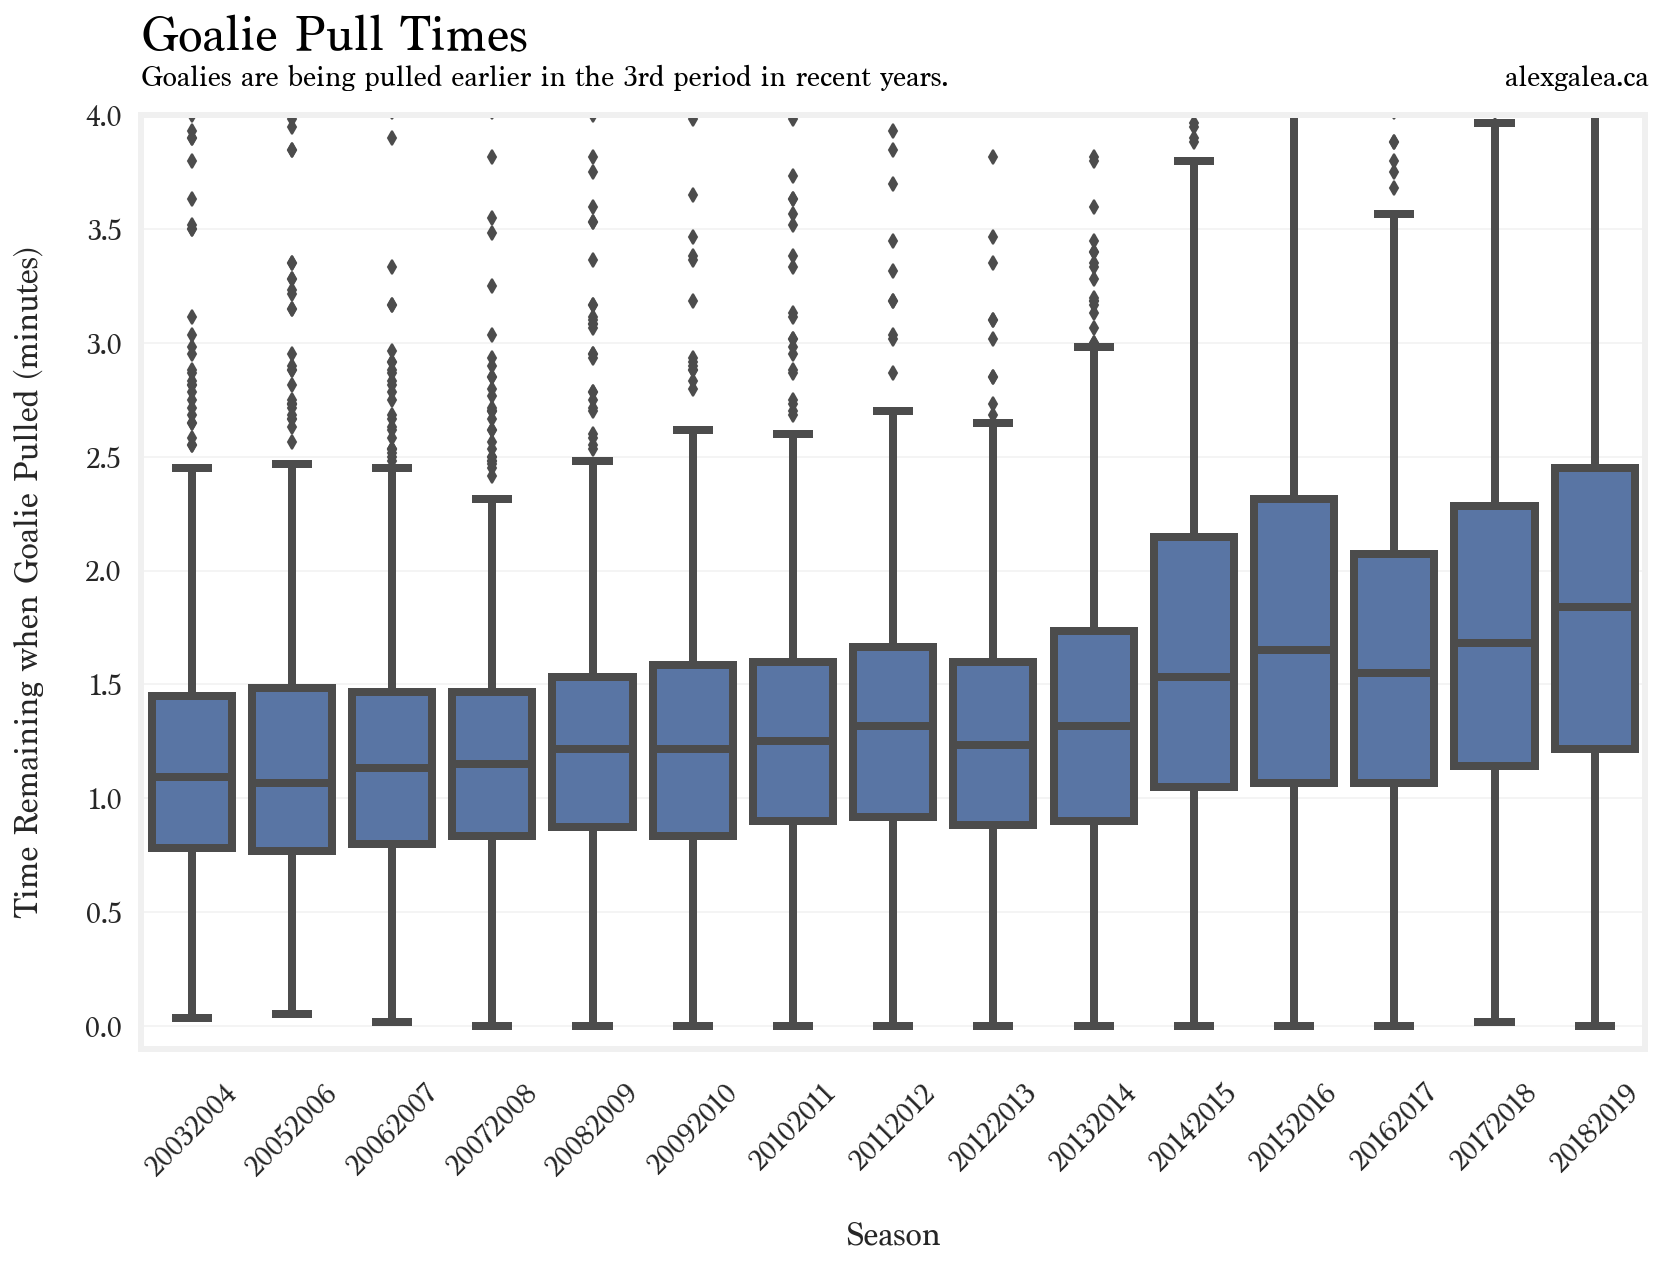

In [69]:
df['pull_time_remaining'] = (
    df['pull_time']
    .apply(lambda x: datetime.timedelta(seconds=60*20) - x)
    .astype('timedelta64[s]')
) / 60
sns.boxplot(x='season', y='pull_time_remaining', data=df, color='b')
plt.ylabel('Time Remaining when Goalie Pulled (minutes)')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylim(-0.1, 4)

plt.text(x=-0.5, y=4.29,
    s='Goalie Pull Times',
    fontsize=24, color='black', weight='bold')

plt.text(x=-0.5, y=4.13,
    s='Goalies are being pulled earlier in the 3rd period in recent years.',
    fontsize=14, color='black', style='italic')

plt.text(x=13.1, y=4.13,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('goalie_pull_times_by_season')

In [39]:
df.groupby('season').pull_time_remaining.mean()

season
20032004    1.191504
20052006    1.210992
20062007    1.208146
20072008    1.200683
20082009    1.252222
20092010    1.231840
20102011    1.287406
20112012    1.321487
20122013    1.269014
20132014    1.403227
20142015    1.699053
20152016    1.839477
20162017    1.627312
20172018    1.753963
20182019    1.912778
Name: pull_time_remaining, dtype: float64

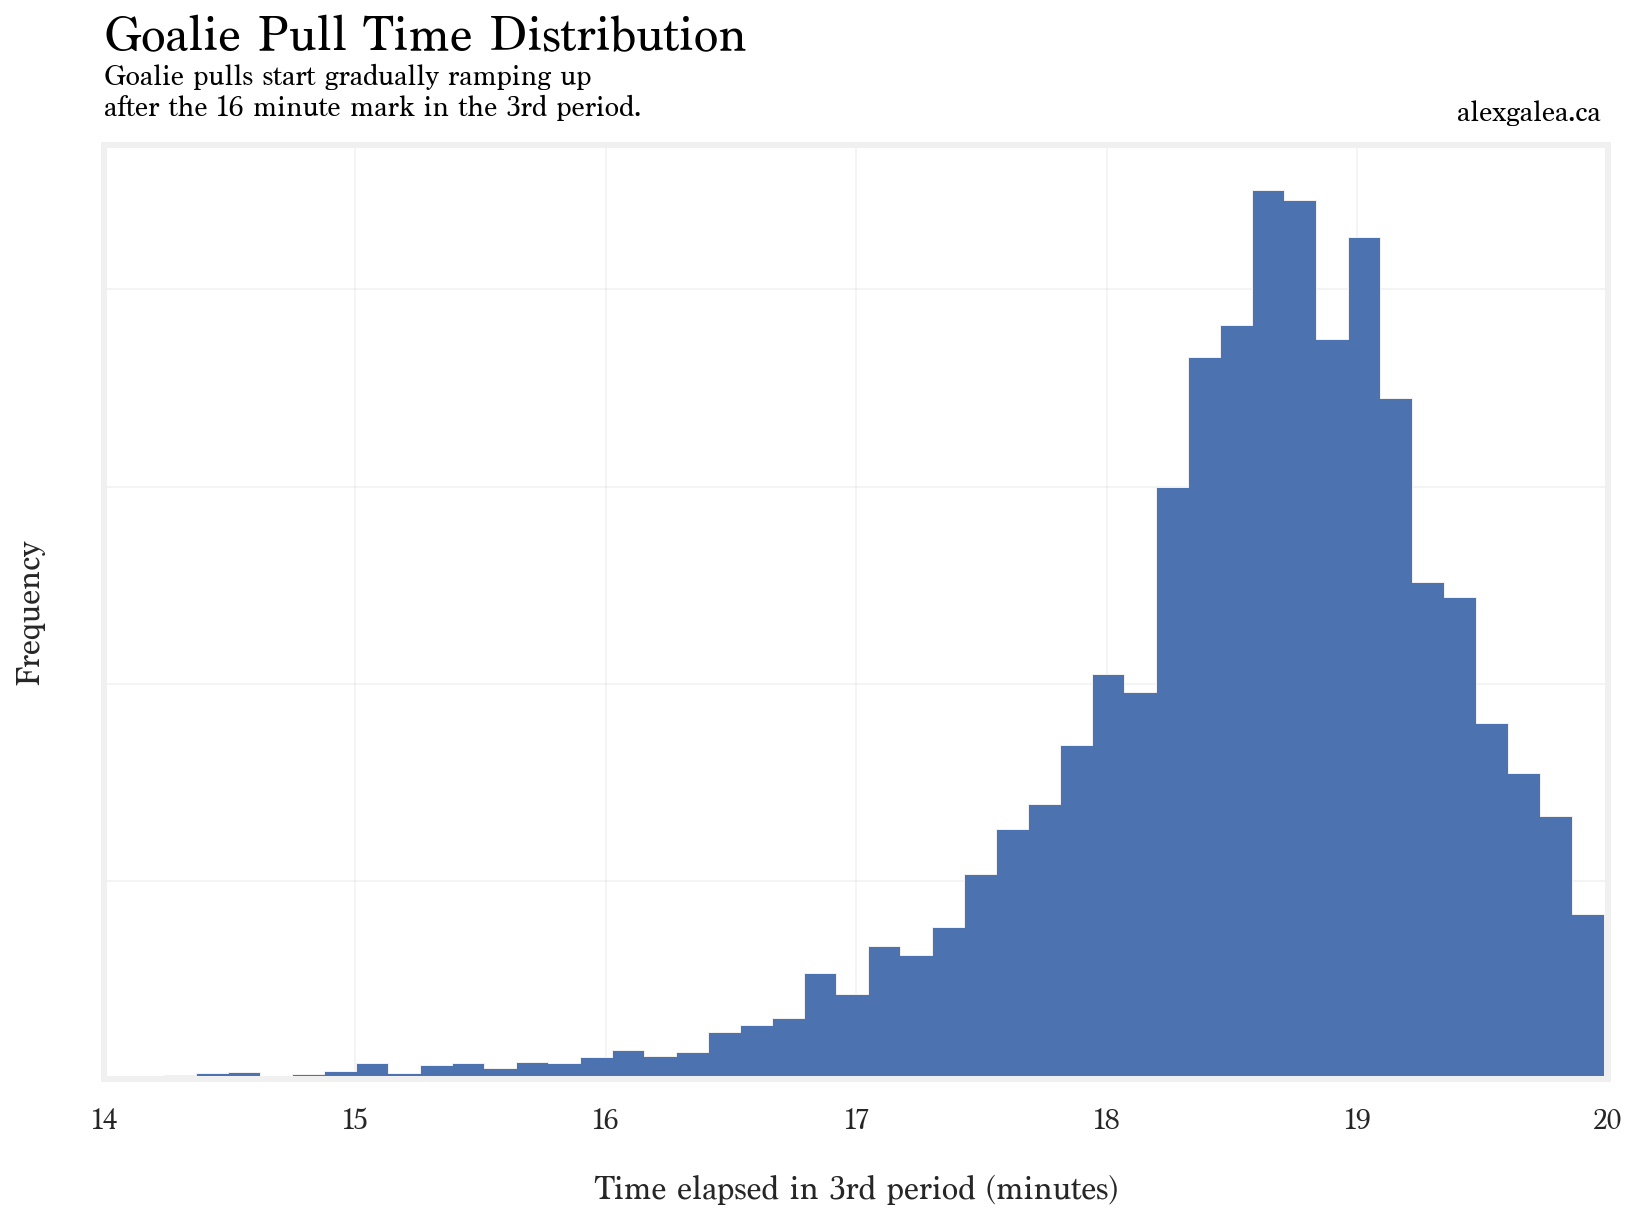

In [71]:
col = 'pull_time'
(df[col].astype('timedelta64[s]') / 60)\
    .plot.hist(bins=100,
               color='b',
               histtype='stepfilled')
plt.xlabel('Time elapsed in 3rd period (minutes)')
ax = plt.gca()
ax.set_yticklabels([])
plt.xlim(14, 20)

plt.text(x=14, y=1043,
    s='Goalie Pull Time Distribution',
    fontsize=24, color='black', weight='bold')

plt.text(x=14, y=976,
    s='Goalie pulls start gradually ramping up\nafter the 16 minute mark in the 3rd period.',
    fontsize=14, color='black', style='italic')

plt.text(x=19.4, y=971,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('goalie_pull_game_times_hist')

We're interested in knowing about the outcome, given the pull time. This way we can look at the odds of scoring as a function of game time elapsed.

In [72]:
df.head()

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time,label,pull_time_remaining
0,20032004,710,CHI,2004-01-21,3,00:19:44,NaT,00:19:47,NaT,00:00:03,NaT,NaT,goal_against,0.266667
1,20032004,205,MIN,2003-11-08,3,00:19:58,NaT,NaT,NaT,NaT,00:00:02,NaT,no_goals,0.033333
2,20032004,1230,S.J,2004-04-04,3,00:18:39,00:19:40,NaT,00:01:01,NaT,NaT,NaT,goal_for,1.350000
3,20032004,655,PHX,2004-01-13,3,00:19:03,NaT,00:19:25,NaT,00:00:22,NaT,NaT,goal_against,0.950000
4,20032004,985,PHX,2004-03-02,3,00:18:34,00:18:44,NaT,00:00:10,NaT,NaT,NaT,goal_for,1.433333


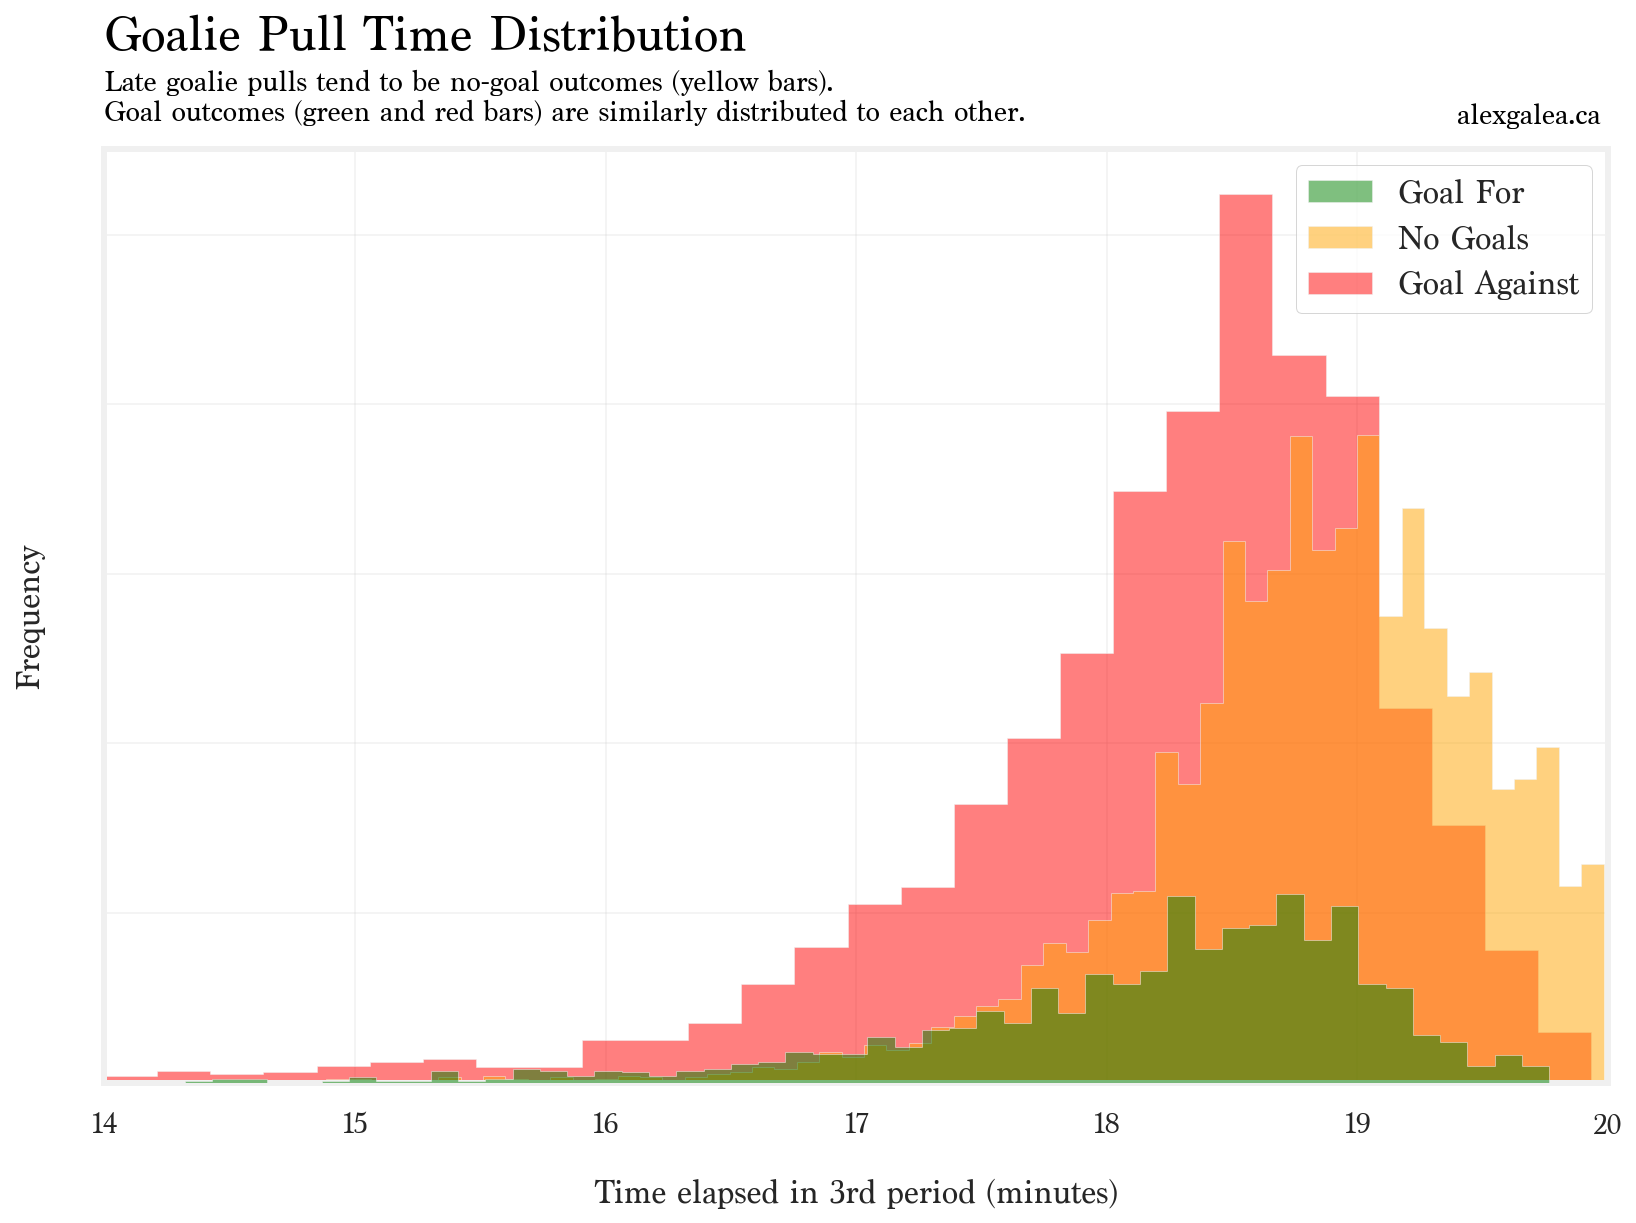

In [79]:
# ax = plt.subplot(111)
# ax.set_prop_cycle(color=['red', 'green', 'orange'])

df['pull_time_seconds'] = df['pull_time'].astype('timedelta64[s]') / 60

fig, ax = plt.subplots()
iterables = zip(['green', 'orange', 'red'],
                [3, 2, 1],
                ['goal_for', 'no_goals', 'goal_against'])

legend_map = {
    'no_goals': 'No Goals',
    'goal_against': 'Goal Against',
    'goal_for': 'Goal For'
}

for c, z, label in iterables:
    (df[df.label==label]['pull_time_seconds']
         .plot.hist(bins=60,
                    alpha=0.5,
                    color=c,
                    histtype='stepfilled',
                    label=legend_map[label],
                    zorder=z))

plt.xlabel('Time elapsed in 3rd period (minutes)')
plt.gca().set_yticklabels([])
plt.xlim(14, 20)
plt.legend()

plt.text(x=14, y=609,
    s='Goalie Pull Time Distribution',
    fontsize=24, color='black', weight='bold')

plt.text(x=14, y=567,
    s='Late goalie pulls tend to be no-goal outcomes (yellow bars).\nGoal outcomes (green and red bars) are similarly distributed to each other.',
    fontsize=14, color='black', style='italic')

plt.text(x=19.4, y=565,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('goalie_pull_outcomes_game_times_hist')
del df['pull_time_seconds']

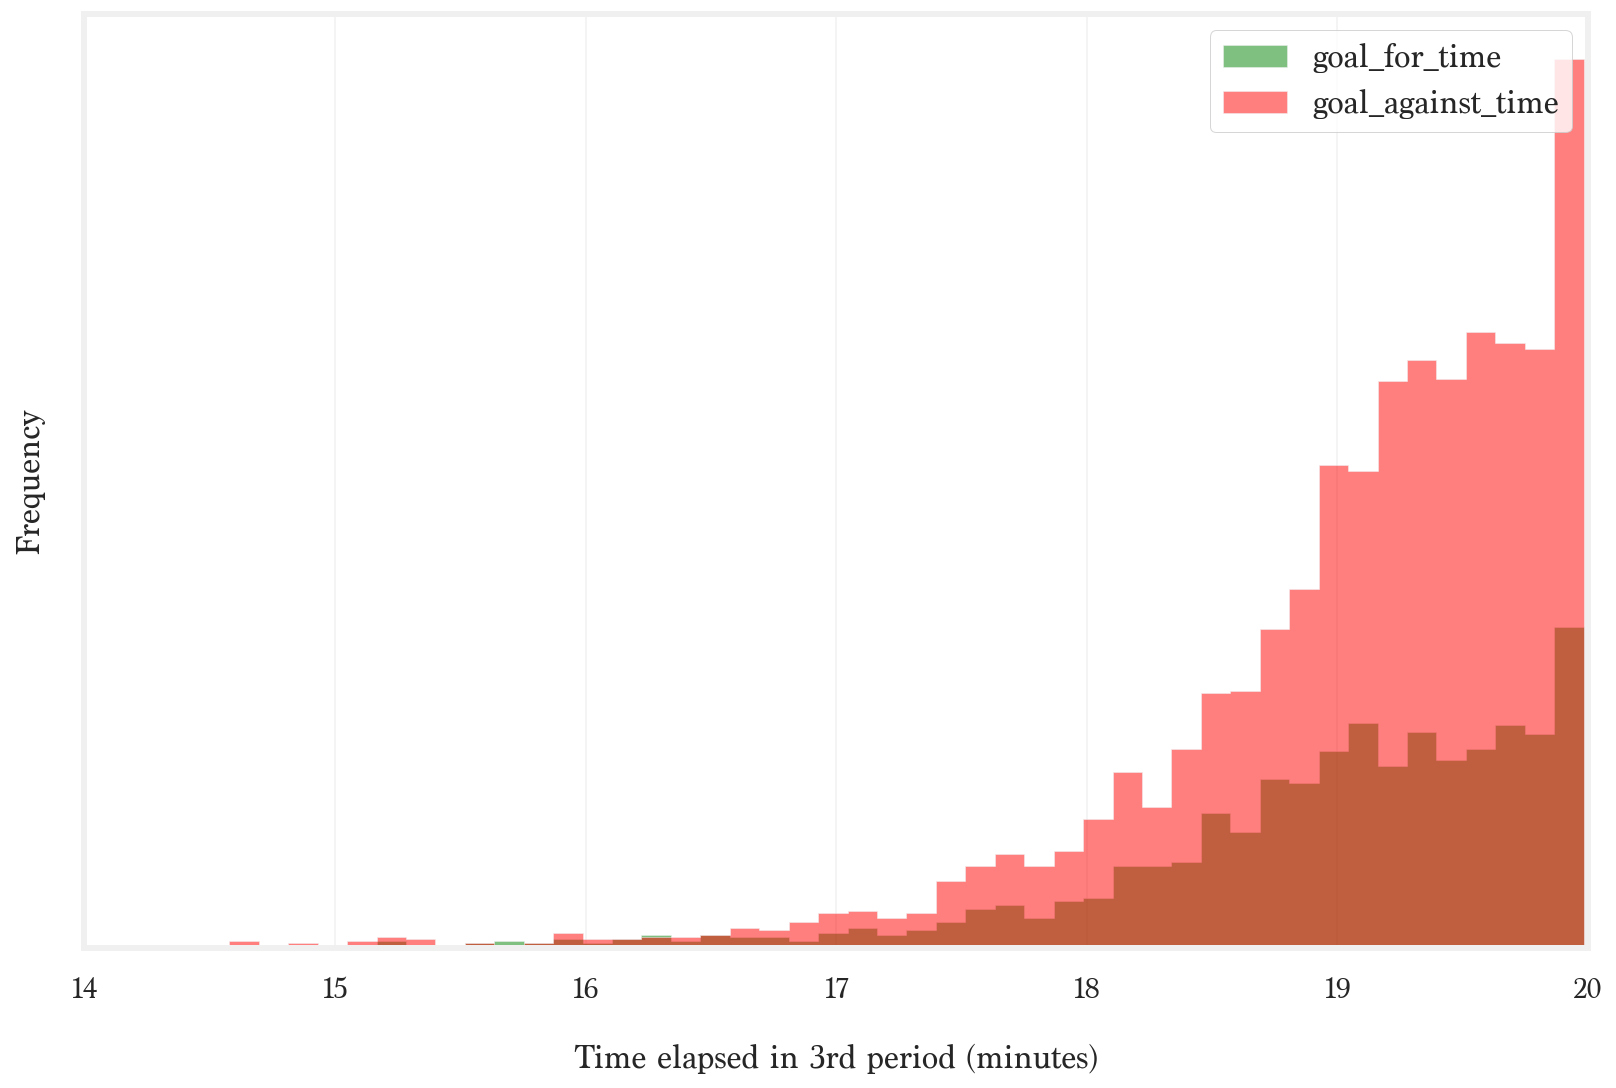

In [80]:
cols = ['goal_for_time', 'goal_against_time']
(df[cols].astype('timedelta64[s]') / 60)\
    .plot.hist(bins=100,
               alpha=0.5,
               color=['green', 'red'],
               histtype='stepfilled')
plt.xlabel('Time elapsed in 3rd period (minutes)')
plt.yticks([])
plt.xlim(14, 20)
savefig('5_on_6_goals')

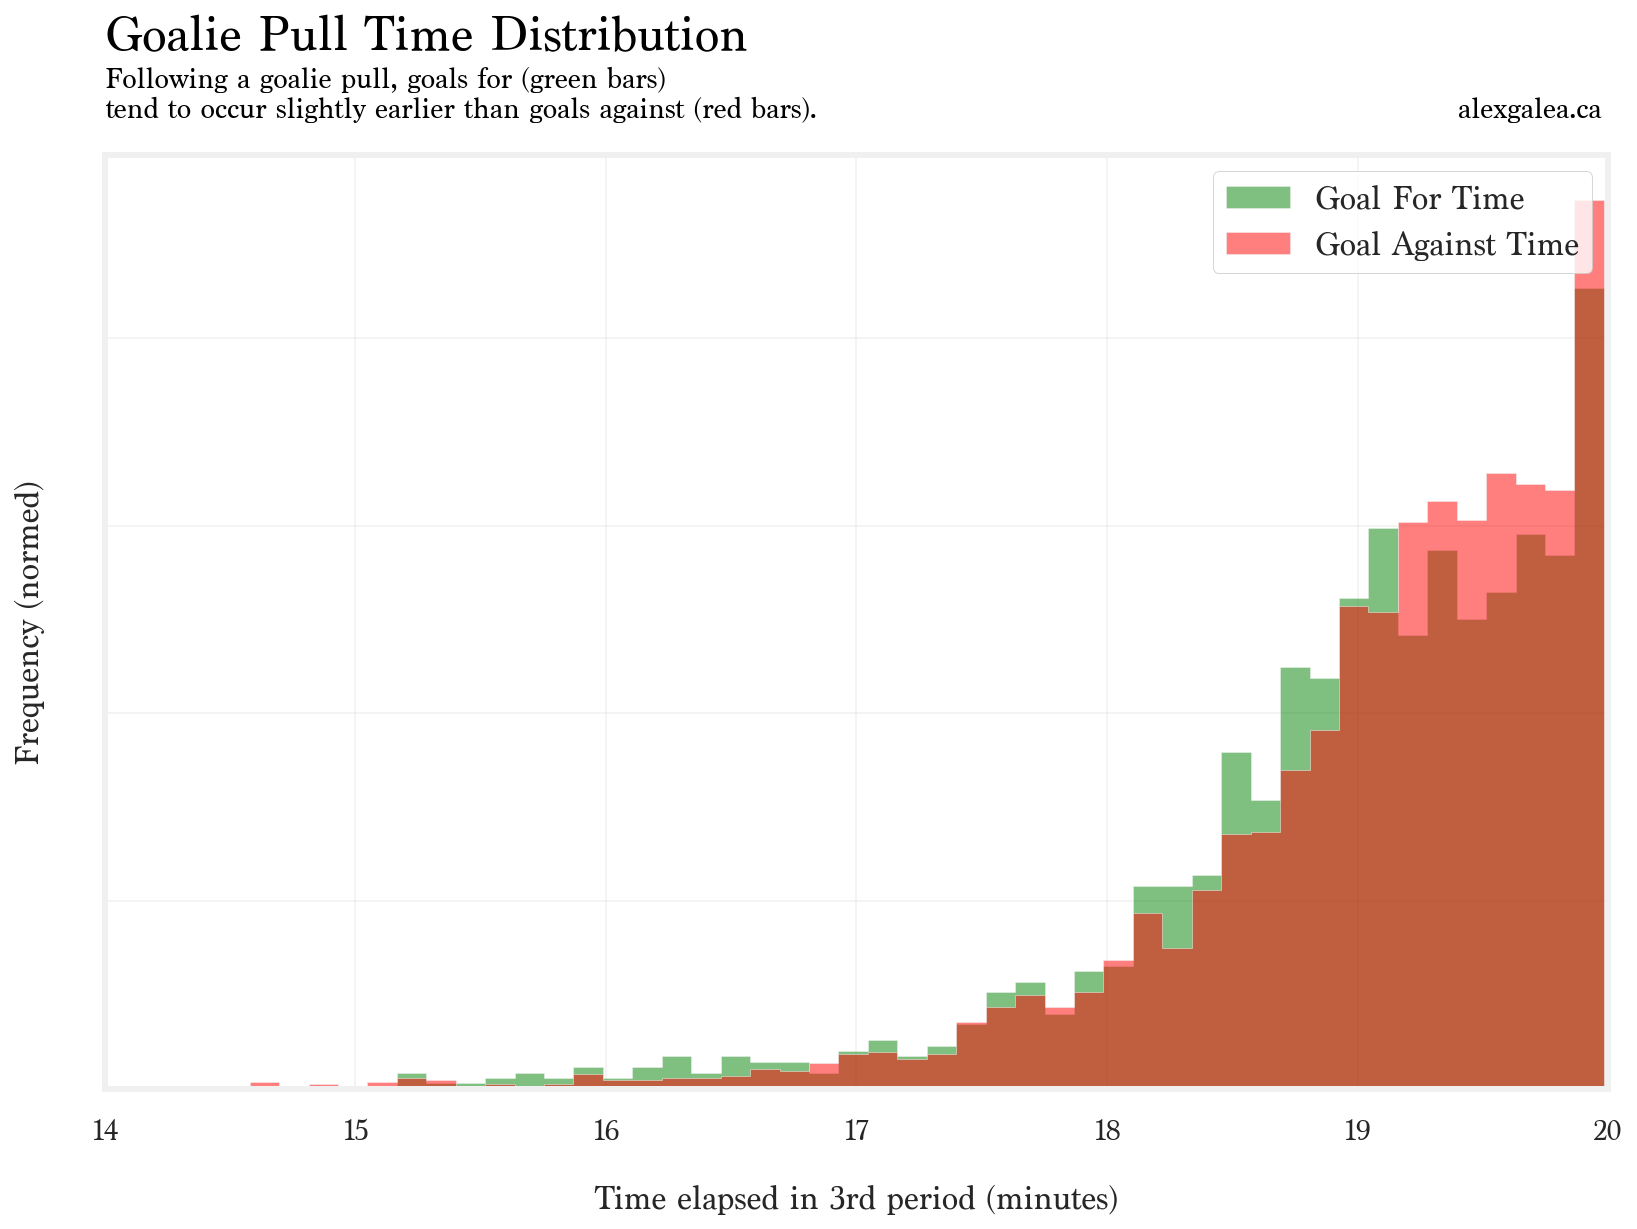

In [82]:
cols = ['goal_for_time', 'goal_against_time']

legend_map = {
    'goal_for_time': 'Goal For Time',
    'goal_against_time': 'Goal Against Time',
}

(df[cols]
    .rename(columns=legend_map)
    .astype('timedelta64[s]') / 60)\
    .plot.hist(bins=100,
               alpha=0.5,
               density='normed',
               color=['green', 'red'],
               histtype='stepfilled')
plt.xlabel('Time elapsed in 3rd period (minutes)')
plt.ylabel('Frequency (normed)')
plt.gca().set_yticklabels([])
plt.xlim(14, 20)

plt.text(x=14, y=1.108,
    s='Goalie Pull Time Distribution',
    fontsize=24, color='black', weight='bold')

plt.text(x=14, y=1.035,
    s='Following a goalie pull, goals for (green bars)\ntend to occur slightly earlier than goals against (red bars).',
    fontsize=14, color='black', style='italic')

plt.text(x=19.4, y=1.035,
    s='alexgalea.ca',
    fontsize=14, color='black', style='italic')


savefig('5_on_6_goals_normed')

In [83]:
print('Number of goals found:')
(~df[['goal_for_time', 'goal_against_time']].isnull()).sum()

Number of goals found:


goal_for_time        1496
goal_against_time    3736
dtype: int64

In [84]:
print('Total goals found:')
(~df[['goal_for_time', 'goal_against_time']].isnull()).sum().sum()

Total goals found:


5232

We also want to model the time between goalie pull and goal (i.e. the timedelta).

([], <a list of 0 Text yticklabel objects>)

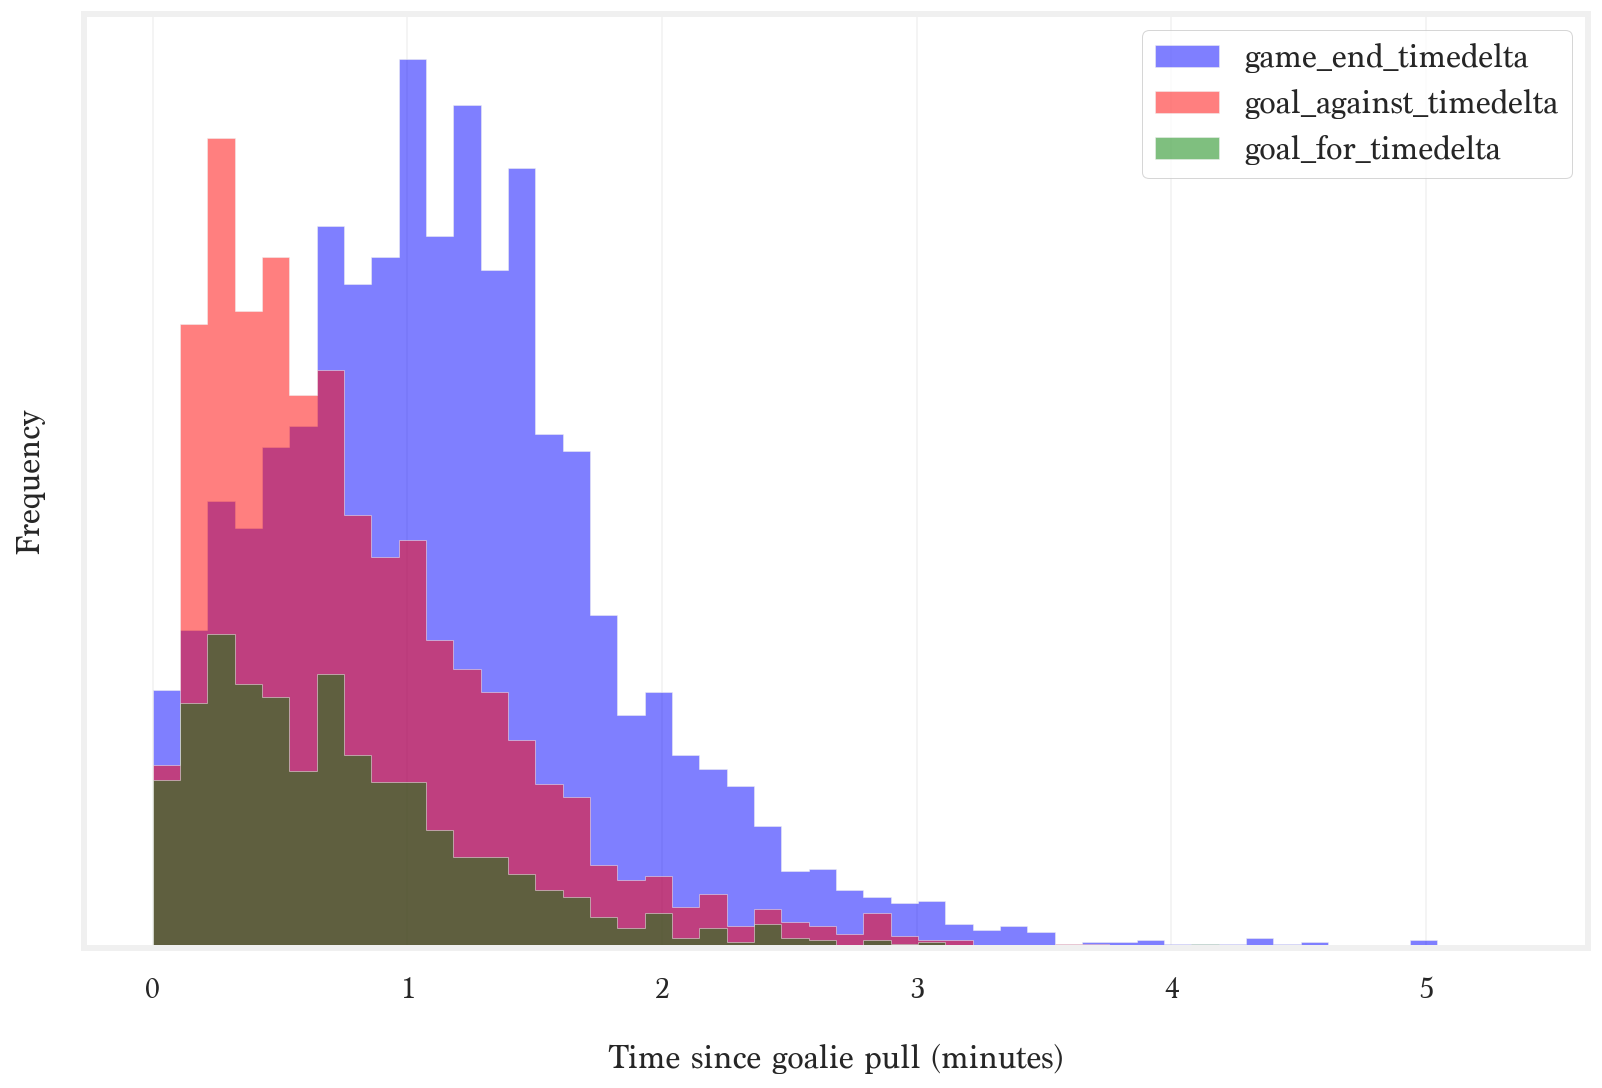

In [85]:
cols = ['game_end_timedelta', 'goal_against_timedelta', 'goal_for_timedelta', ]
(df[cols].astype('timedelta64[s]') / 60)\
    .plot.hist(bins=50, alpha=0.5,
               color=['blue', 'red','green'],
               histtype='stepfilled')
plt.xlabel('Time since goalie pull (minutes)')
plt.yticks([])
# savefig('5_on_6_goalie_pull_outcomes')

([], <a list of 0 Text yticklabel objects>)

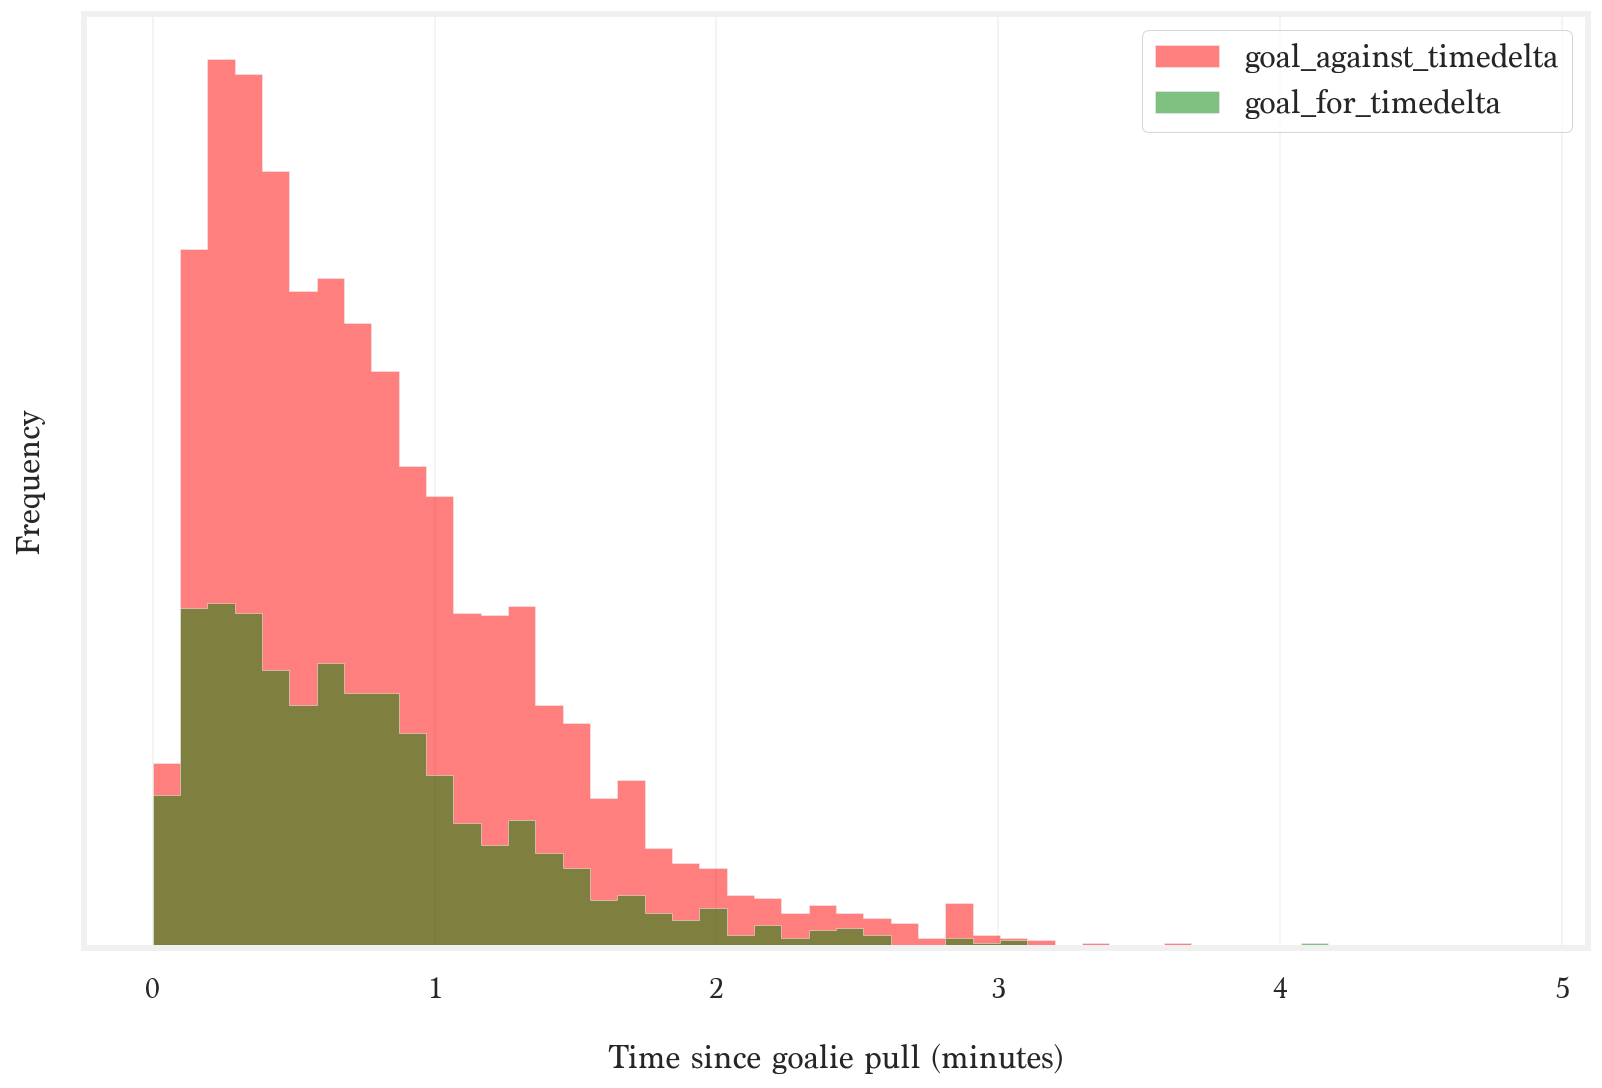

In [86]:
cols = ['goal_against_timedelta', 'goal_for_timedelta', ]
(df[cols].astype('timedelta64[s]') / 60)\
    .plot.hist(bins=50, alpha=0.5,
               color=['red', 'green',],
               histtype='stepfilled')
plt.xlabel('Time since goalie pull (minutes)')
plt.yticks([])
# savefig('5_on_6_goalie_pull_goal_timedeltas')

([], <a list of 0 Text yticklabel objects>)

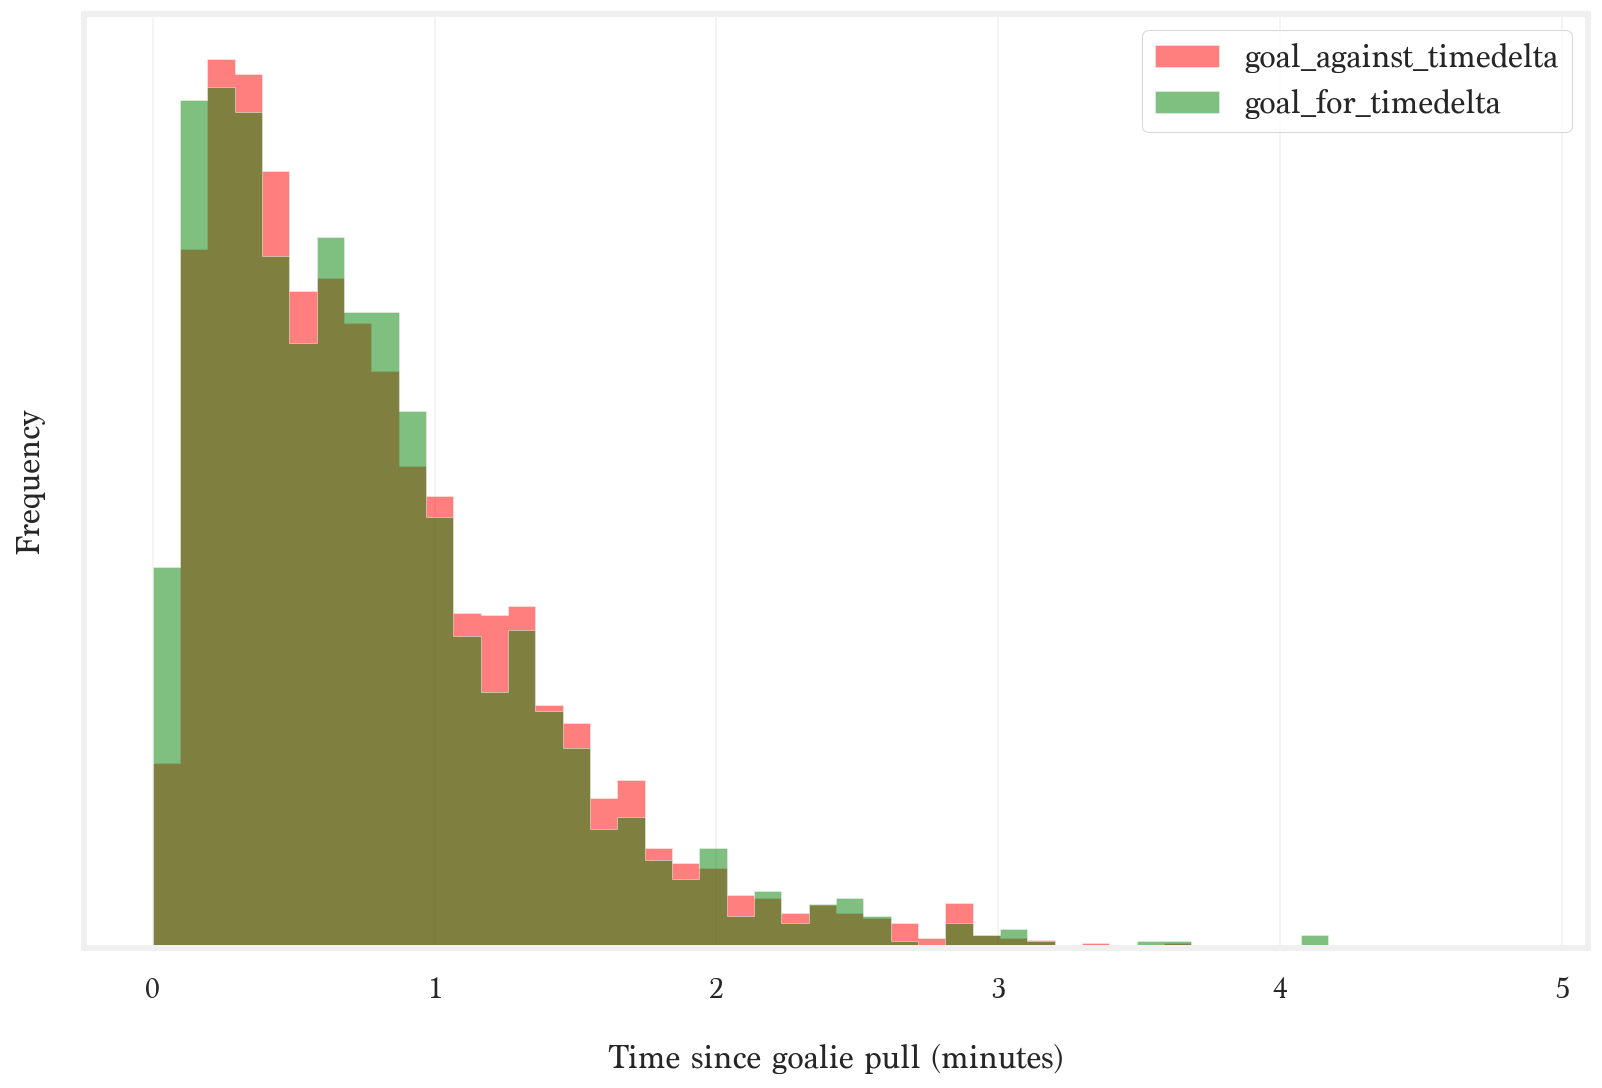

In [87]:
cols = ['goal_against_timedelta', 'goal_for_timedelta', ]
(df[cols].astype('timedelta64[s]') / 60)\
    .plot.hist(bins=50, alpha=0.5,
               density='normed',
               color=['red', 'green'],
               histtype='stepfilled')
plt.xlabel('Time since goalie pull (minutes)')
plt.yticks([])
# savefig('5_on_6_goalie_pull_goal_timedeltas_normed')

The mean/median number of seconds until a goal (after pulling the goalie)

In [88]:
(df[cols].astype('timedelta64[s]')).mean()

goal_against_timedelta    48.181745
goal_for_timedelta        45.568182
dtype: float64

In [89]:
(df[cols].astype('timedelta64[s]')).median()

goal_against_timedelta    40.0
goal_for_timedelta        39.0
dtype: float64

([], <a list of 0 Text yticklabel objects>)

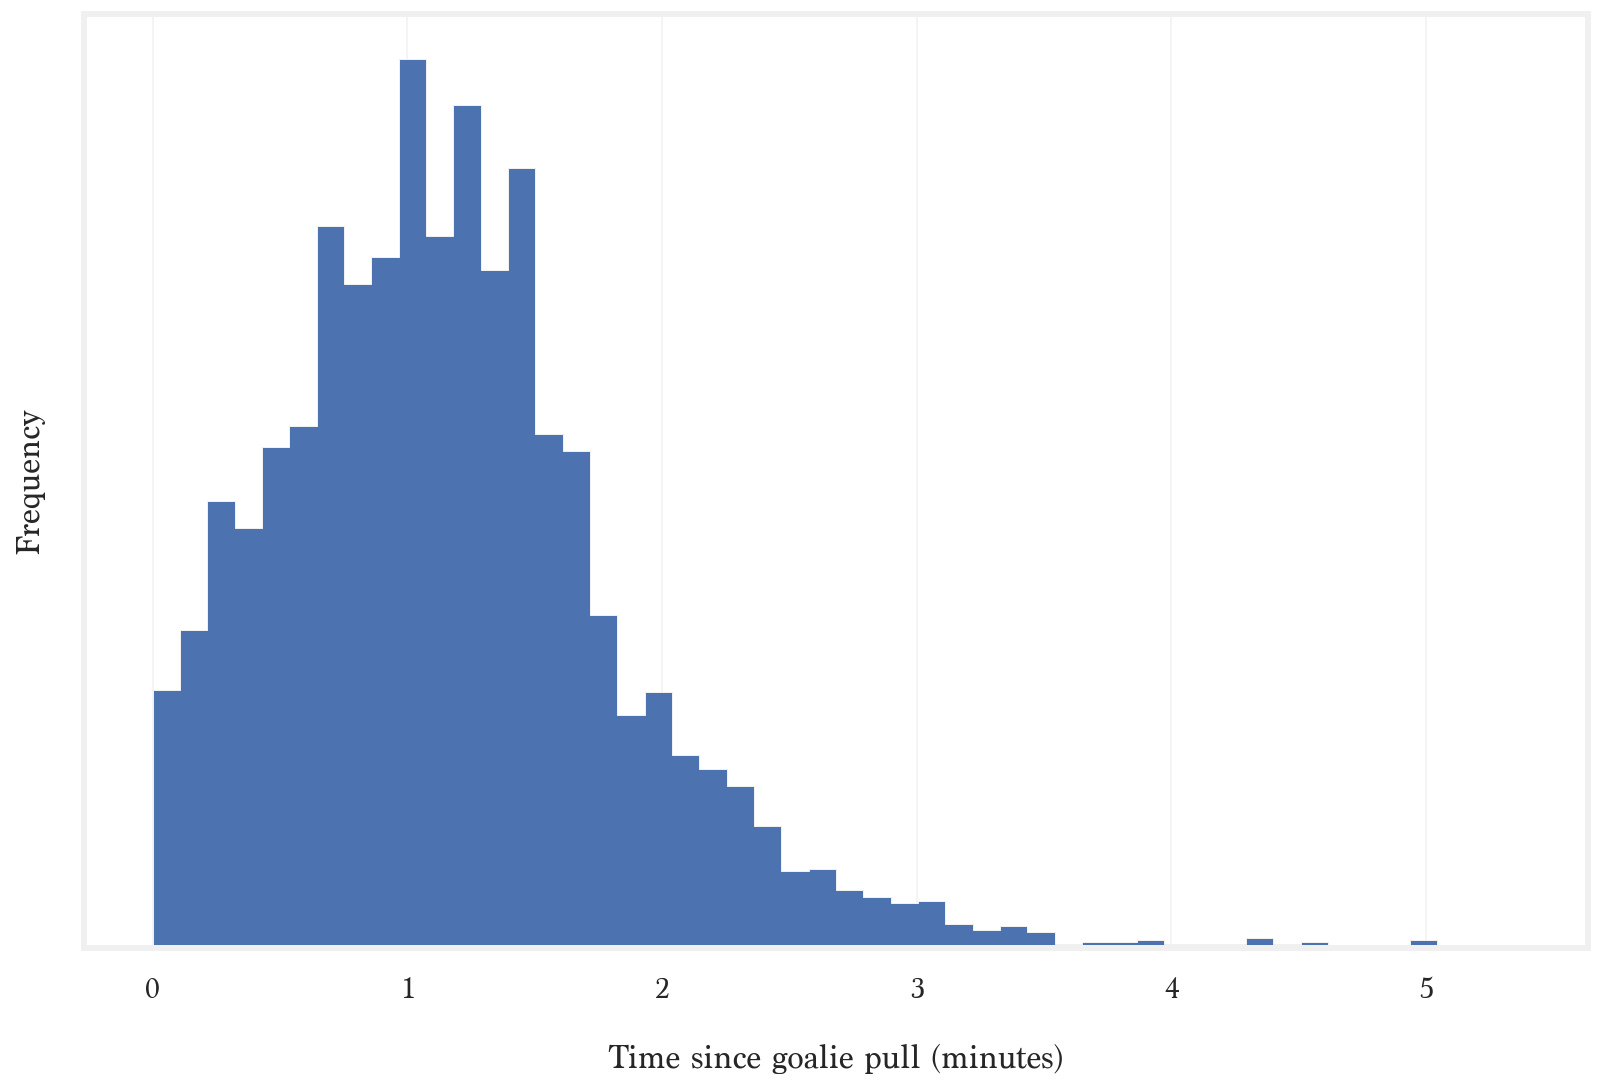

In [90]:
(df['game_end_timedelta'].astype('timedelta64[s]') / 60).plot.hist(bins=50, color='b', histtype='stepfilled')
plt.xlabel('Time since goalie pull (minutes)')
plt.yticks([])
# savefig('5_on_6_game_end_timedeltas')

### Rough work

## Bugs

### *2019-02-01*

In [247]:
df = load_data()

Any non 3rd period pulls?

In [248]:
df[df['pull_period'] != 3]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,game_end_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta


Any bugs not in the last 15 minutes?

In [120]:
mask = df.pull_time < datetime.timedelta(seconds=15*60)
df[mask].shape[0]

0

I noticed some goal for timedelats less than 0.. which makes no sense. I'll have to look into that

In [121]:
mask = df.goal_for_time < datetime.timedelta(seconds=15*60)
df[mask]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,game_end_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta
576,20052006,591,NYI,2006-01-04,3,00:19:51,00:02:15,NaT,00:02:15,-1 days +23:42:24,NaT,-1 days +23:42:24


This game is weird... http://www.nhl.com/scores/htmlreports/20052006/PL020591.HTM

We'll drop this point before modeling.

In [150]:
df[df.goal_for_timedelta < datetime.timedelta(0)]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,game_end_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta
29,20032004,907,ATL,2004-02-21,3,00:19:14,00:18:59,NaT,00:20:00,-1 days +23:59:45,NaT,00:00:46
320,20032004,367,CHI,2003-12-03,3,00:18:19,00:18:01,NaT,00:19:43,-1 days +23:59:42,NaT,00:01:24
462,20032004,754,PHX,2004-01-27,3,00:19:22,00:17:52,NaT,00:19:54,-1 days +23:58:30,NaT,00:00:32
192,20062007,665,BOS,2007-01-13,3,00:17:23,00:17:13,NaT,00:19:33,-1 days +23:59:50,NaT,00:02:10


http://www.nhl.com/scores/htmlreports/20032004/PL020907.HTM

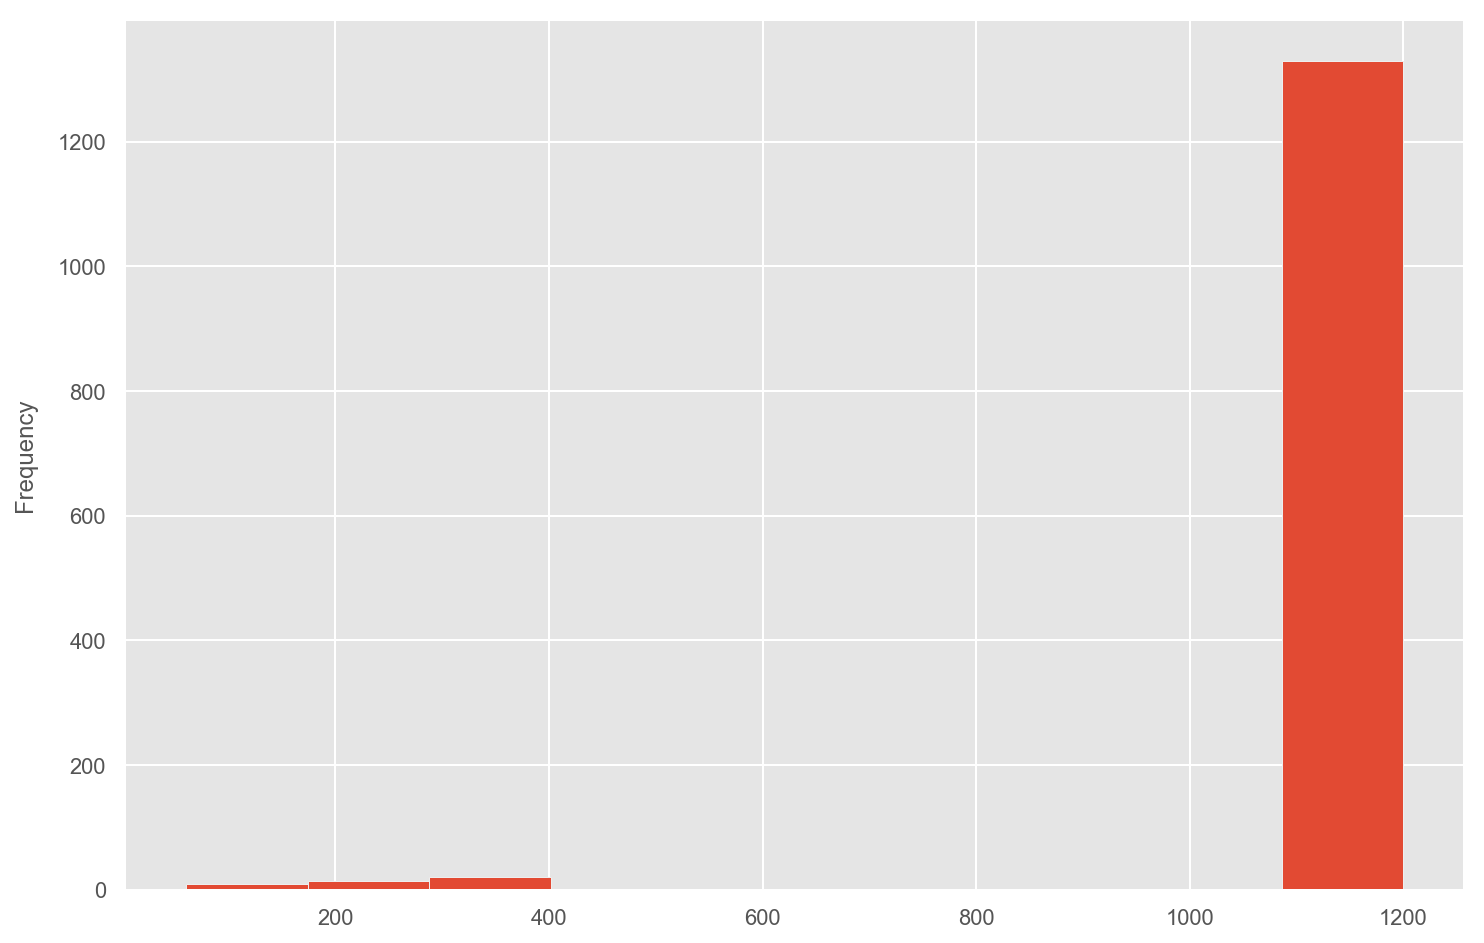

In [35]:
df.game_end_time.astype('timedelta64[s]').plot.hist()

Games should end at 20 mins. Let's throw out the early times (this must be overtime or something).

In [40]:
mask = df.game_end_time < datetime.timedelta(seconds=60*20)
mask.sum(), df.shape[0]

(1273, 2172)

In [41]:
mask = df.game_end_time < datetime.timedelta(seconds=60*15)
mask.sum(), df.shape[0]

(44, 2172)

Obviously the game will end at 20:00, this column corresponds to the last row parsed.

*2019-04-25*

In [43]:
df = load_data()

Any non 3rd period pulls?

In [44]:
df[df['pull_period'] != 3]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time
2,20072008,751,NSH,2008-01-24,1,00:00:00,NaT,NaT,NaT,NaT,00:00:44,00:00:44
3,20072008,1158,WSH,2008-03-27,1,00:00:00,NaT,NaT,NaT,NaT,00:00:52,00:00:52
4,20072008,696,CBJ,2008-01-17,1,00:00:00,NaT,NaT,NaT,NaT,00:01:27,00:01:27
5,20072008,946,STL,2008-02-24,1,00:00:00,NaT,NaT,NaT,NaT,00:00:47,00:00:47
6,20072008,1070,VAN,2008-03-13,1,00:00:00,NaT,NaT,NaT,NaT,00:01:14,00:01:14
9,20072008,570,DET,2007-12-29,1,00:00:00,NaT,NaT,NaT,NaT,00:00:16,00:00:16
12,20072008,618,ANA,2008-01-05,1,00:00:00,NaT,NaT,NaT,NaT,00:00:18,00:00:18
20,20072008,1084,EDM,2008-03-15,1,00:00:00,NaT,NaT,NaT,NaT,00:00:07,00:00:07
21,20072008,14,STL,2007-10-04,1,00:00:00,NaT,NaT,NaT,NaT,00:00:09,00:00:09
23,20072008,526,VAN,2007-12-22,1,00:00:00,NaT,NaT,NaT,NaT,00:00:12,00:00:12


In [46]:
df.pull_period.value_counts().sort_index()

1      205
2      340
3    14532
4     1453
5     1336
Name: pull_period, dtype: int64

None of these make sense.. we'll want to drop them

Any bugs not in the last 15 minutes?

In [47]:
mask = df.pull_time < datetime.timedelta(seconds=15*60)
df[mask].shape[0]

4241

In [48]:
df[mask]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time
2,20072008,751,NSH,2008-01-24,1,00:00:00,NaT,NaT,NaT,NaT,00:00:44,00:00:44
3,20072008,1158,WSH,2008-03-27,1,00:00:00,NaT,NaT,NaT,NaT,00:00:52,00:00:52
4,20072008,696,CBJ,2008-01-17,1,00:00:00,NaT,NaT,NaT,NaT,00:01:27,00:01:27
5,20072008,946,STL,2008-02-24,1,00:00:00,NaT,NaT,NaT,NaT,00:00:47,00:00:47
6,20072008,1070,VAN,2008-03-13,1,00:00:00,NaT,NaT,NaT,NaT,00:01:14,00:01:14
9,20072008,570,DET,2007-12-29,1,00:00:00,NaT,NaT,NaT,NaT,00:00:16,00:00:16
12,20072008,618,ANA,2008-01-05,1,00:00:00,NaT,NaT,NaT,NaT,00:00:18,00:00:18
20,20072008,1084,EDM,2008-03-15,1,00:00:00,NaT,NaT,NaT,NaT,00:00:07,00:00:07
21,20072008,14,STL,2007-10-04,1,00:00:00,NaT,NaT,NaT,NaT,00:00:09,00:00:09
22,20072008,422,MTL,2007-12-08,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00


I noticed some goal for timedelats less than 0.. which makes no sense. I'll have to look into that

In [49]:
mask = df.goal_for_time < datetime.timedelta(seconds=15*60)
df[mask]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time
557,20052006,591,NYI,2006-01-04,3,00:19:51,00:02:15,NaT,-1 days +23:42:24,NaT,NaT,NaT
65,20072008,562,OTT,2007-12-29,2,00:10:05,00:10:06,NaT,00:00:01,NaT,NaT,NaT
111,20072008,175,MTL,2007-11-01,1,00:08:36,00:08:53,NaT,00:00:17,NaT,NaT,NaT
19,20082009,588,N.J,2009-01-06,3,00:11:40.500000,00:12:12,NaT,00:00:31.500000,NaT,NaT,NaT
71,20082009,1042,BUF,2009-03-17,1,00:03:57,00:04:02,NaT,00:00:05,NaT,NaT,NaT
89,20082009,1167,PHI,2009-04-04,2,00:02:56,00:02:58,NaT,00:00:02,NaT,NaT,NaT
95,20082009,959,OTT,2009-03-05,2,00:03:57.500000,00:04:03,NaT,00:00:05.500000,NaT,NaT,NaT
50,20092010,907,PHI,2010-02-13,3,00:10:53,00:10:53,NaT,00:00:00,NaT,00:09:07,00:20:00
69,20092010,815,CGY,2010-01-30,1,00:13:06,00:13:20,NaT,00:00:14,NaT,NaT,NaT
75,20092010,1123,TOR,2010-03-28,2,00:14:30.500000,00:14:35,NaT,00:00:04.500000,NaT,NaT,NaT


We'll have to drop these as well

In [50]:
df[df.goal_for_timedelta < datetime.timedelta(0)]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time
557,20052006,591,NYI,2006-01-04,3,00:19:51,00:02:15,NaT,-1 days +23:42:24,NaT,NaT,NaT
572,20092010,916,NYR,2010-02-14,2,00:10:00,00:01:40,NaT,-1 days +23:51:40,NaT,NaT,NaT
653,20092010,605,L.A,2009-12-31,2,00:10:00,00:03:17,NaT,-1 days +23:53:17,NaT,NaT,NaT
1044,20102011,1055,PHI,2011-03-17,2,00:19:57,00:18:32,NaT,-1 days +23:58:35,NaT,NaT,NaT
27,20112012,244,CAR,2011-11-14,2,00:12:44,00:04:36,NaT,-1 days +23:51:52,NaT,NaT,NaT
48,20112012,585,TOR,2012-01-05,2,00:10:00,00:01:22,NaT,-1 days +23:51:22,NaT,NaT,NaT
924,20112012,217,FLA,2011-11-10,2,00:10:00,00:04:53,NaT,-1 days +23:54:53,NaT,NaT,NaT
1197,20112012,728,STL,2012-01-24,3,00:10:00,00:05:04,NaT,-1 days +23:55:04,NaT,NaT,NaT
1529,20112012,292,PHX,2011-11-21,2,00:10:00,00:07:34,NaT,-1 days +23:57:34,NaT,NaT,NaT
514,20122013,450,PHX,2013-03-21,2,00:10:00,00:02:26,NaT,-1 days +23:52:26,NaT,NaT,NaT


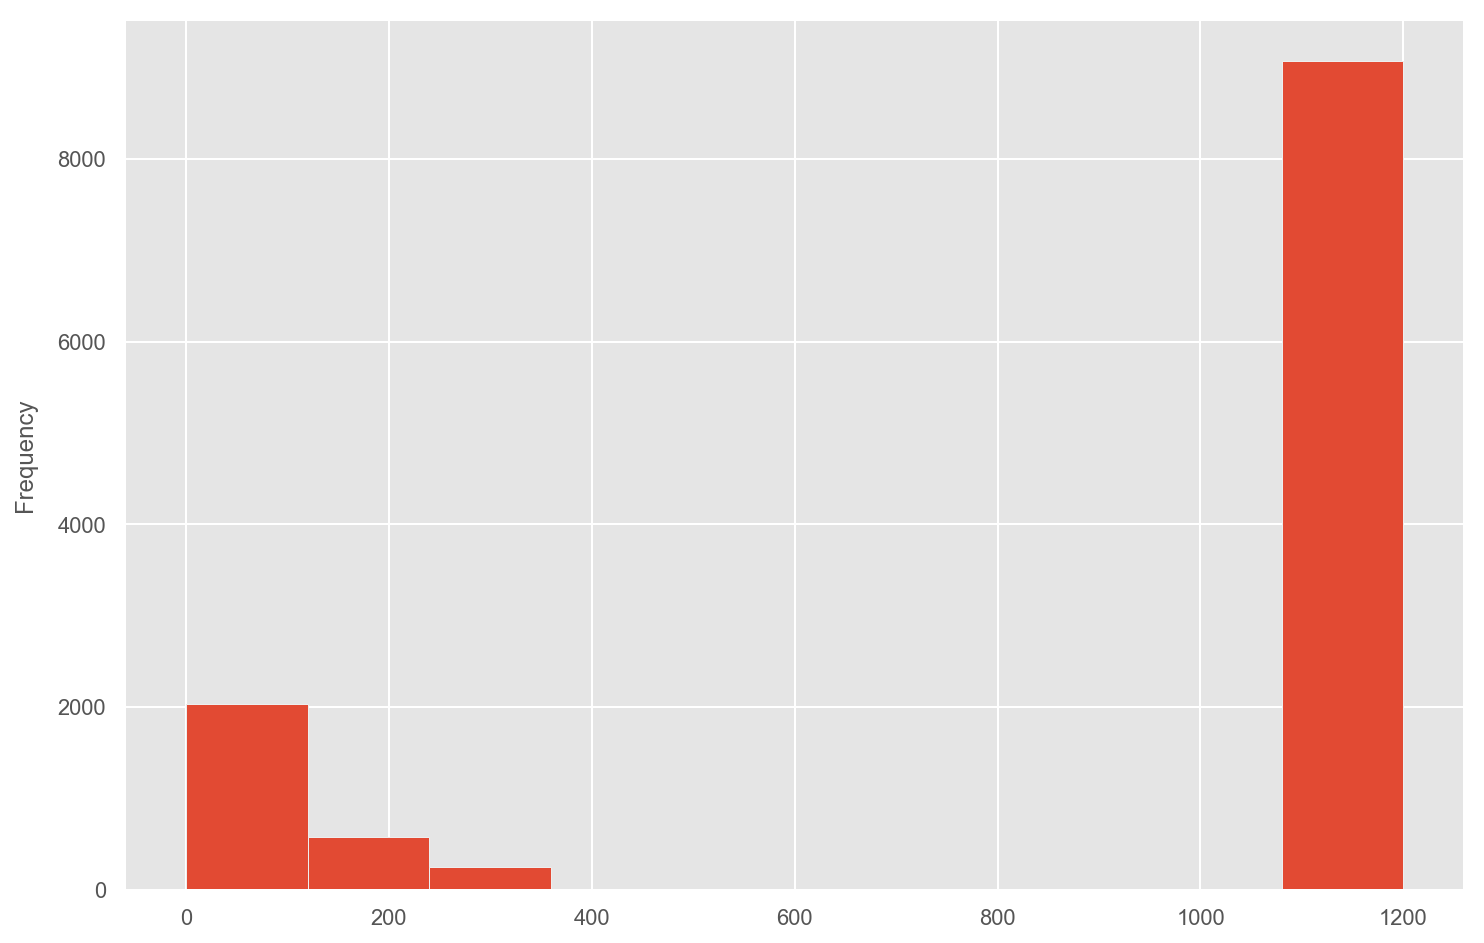

In [51]:
df.game_end_time.astype('timedelta64[s]').plot.hist()

Games should end at 20 mins. Let's throw out the early times (this must be overtime or something).

Obviously the game will end at 20:00, this column corresponds to the last row parsed.

Let's look at the spike in goalie pull times around 10 minutes

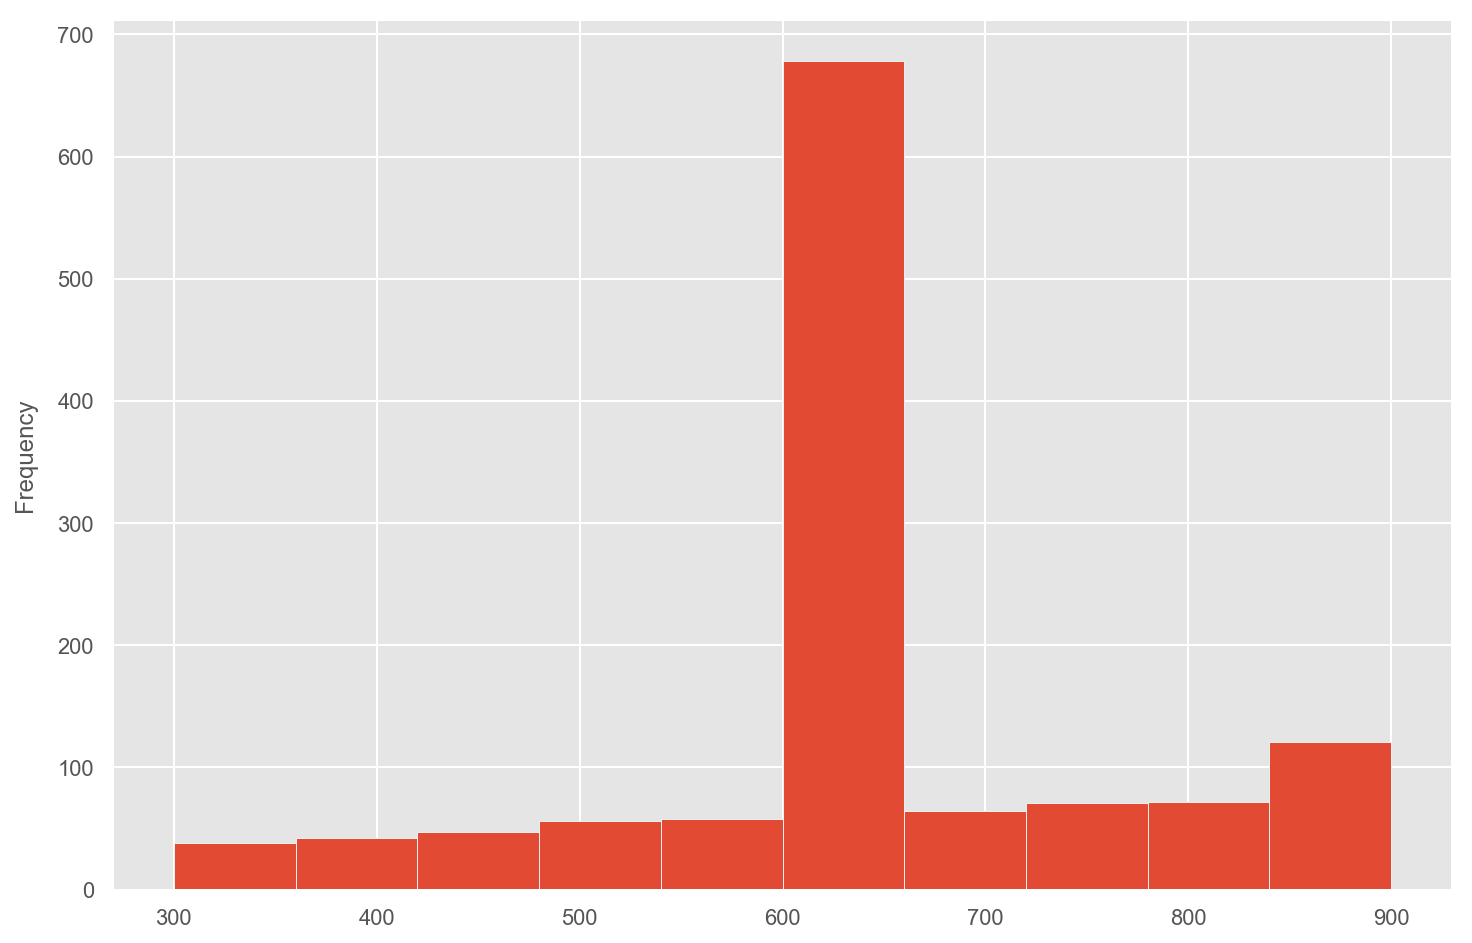

In [60]:
mask = (df.pull_time <= datetime.timedelta(seconds=15*60))\
        & (df.pull_time >= datetime.timedelta(seconds=5*60))
df[mask].pull_time.astype('timedelta64[s]').plot.hist()

In [62]:
df[df.pull_time == datetime.timedelta(seconds=10*60)]

,season,game_number,team_name,date,pull_period,pull_time,goal_for_time,goal_against_time,goal_for_timedelta,goal_against_timedelta,game_end_timedelta,game_end_time
22,20072008,422,MTL,2007-12-08,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
91,20082009,914,S.J,2009-02-26,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
129,20082009,338,MTL,2008-11-29,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
13,20092010,747,NYR,2010-01-21,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
28,20092010,1158,PHI,2010-04-02,2,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
54,20092010,1174,ANA,2010-04-03,2,00:10:00,00:18:28,NaT,00:08:28,NaT,NaT,NaT
71,20092010,1089,VAN,2010-03-23,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
91,20092010,550,MTL,2009-12-23,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
123,20092010,198,BOS,2009-11-03,2,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00
151,20092010,970,PHI,2010-03-07,3,00:10:00,NaT,NaT,NaT,NaT,00:10:00,00:20:00


### *2019-04-26*

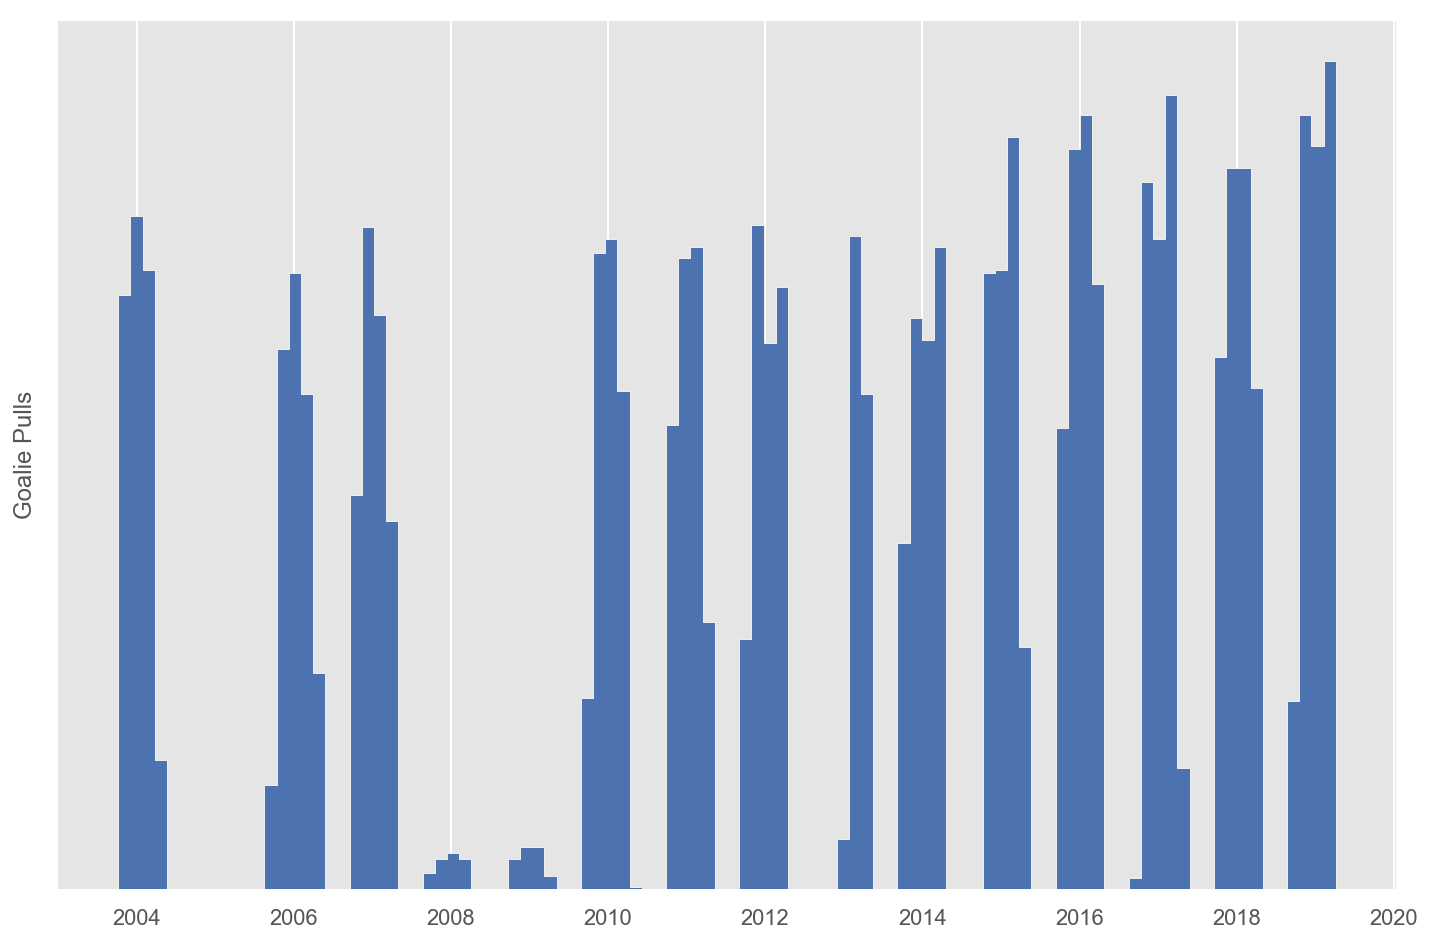

In [39]:
plt.ylabel('Goalie Pulls')
plt.yticks([])
df.date.hist(
    color='b',
    bins=100,
    histtype='stepfilled')
# savefig(plt, 'goalie_pulls_2003-2019')

In [40]:
df.groupby('season').size()

season
20032004    716
20052006    702
20062007    710
20072008     41
20082009     46
20092010    703
20102011    712
20112012    733
20122013    426
20132014    749
20142015    792
20152016    917
20162017    811
20172018    879
20182019    900
dtype: int64

Too few pulls from 2007-2009. I wonder how many HTML files I have for each

In [44]:
!ls ../../data/raw/html/

20032004 20052006 20072008 20092010 20112012 20132014 20152016 20172018
20042005 20062007 20082009 20102011 20122013 20142015 20162017 20182019


In [100]:
import os, glob
def nested_count(folder_path, level=0):
    for folder in sorted(glob.glob('{}/'.format(os.path.join(folder_path, '*')))):
        print('{:}{:}: {:,}'.format('    '*level, os.path.split(os.path.split(folder)[-2])[-1], len(glob.glob(os.path.join(folder, '*')))))
        nested_count(folder, level+1)
nested_count('../../data/')

external: 0
interim: 0
processed: 2
    csv: 16
        tmp: 0
    pkl: 16
        tmp: 17
raw: 1
    html: 16
        20032004: 1,230
        20042005: 0
        20052006: 1,228
        20062007: 1,230
        20072008: 1,230
        20082009: 1,230
        20092010: 1,230
        20102011: 1,230
        20112012: 1,230
        20122013: 720
        20132014: 1,230
        20142015: 1,230
        20152016: 1,230
        20162017: 1,230
        20172018: 1,271
        20182019: 1,271


I will need to look at the parsing for 2007-2009. Something is up

In [102]:
df_ = df[(df.season == '20072008') | (df.season == '20082009')]

In [104]:
len(df_)

87

In [106]:
df_.label.value_counts()

no_goals        51
goal_against    27
goal_for         9
Name: label, dtype: int64

It turns out that some tables just aren't being parsed properly... I need to use html.parser instead of lxml in some cases

### *2019-04-30*

Text(0, 0.5, 'Total Goalie Pulls')

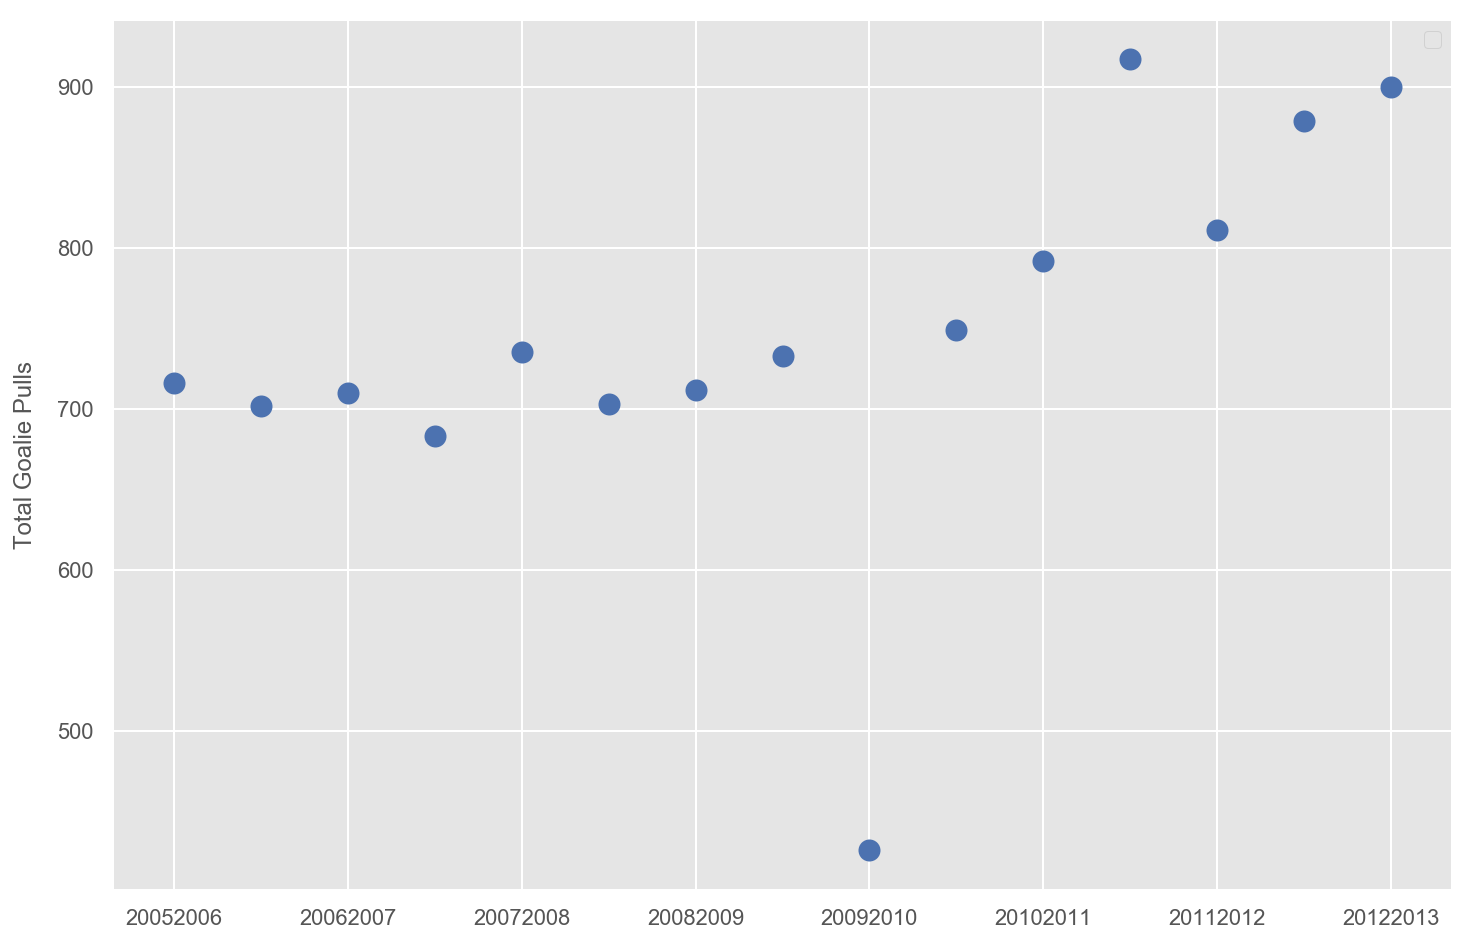

In [244]:
fig, ax = plt.subplots()
s = df.groupby('season').size().sort_index(ascending=True).rename('counts').reset_index()
ax = s.plot(marker='o', lw=0, ax=ax, color='b', ms=10)
ax.set_xticklabels(s.season.tolist());
# ax.set_ylim(600, 1100)
plt.legend([])
plt.ylabel('Total Goalie Pulls')
# savefig('goalie_pulls_by_season')

In [319]:
label_map

{'0': '20032004',
 '1': '20052006',
 '2': '20062007',
 '3': '20072008',
 '4': '20082009',
 '5': '20092010',
 '6': '20102011',
 '7': '20112012',
 '8': '20122013',
 '9': '20132014',
 '10': '20142015',
 '11': '20152016',
 '12': '20162017',
 '13': '20172018',
 '14': '20182019'}

In [320]:
xticks

['',
 '20032004',
 '20062007',
 '20082009',
 '20102011',
 '20122013',
 '20142015',
 '20162017',
 '20182019']

ValueError: cannot reindex from a duplicate axis

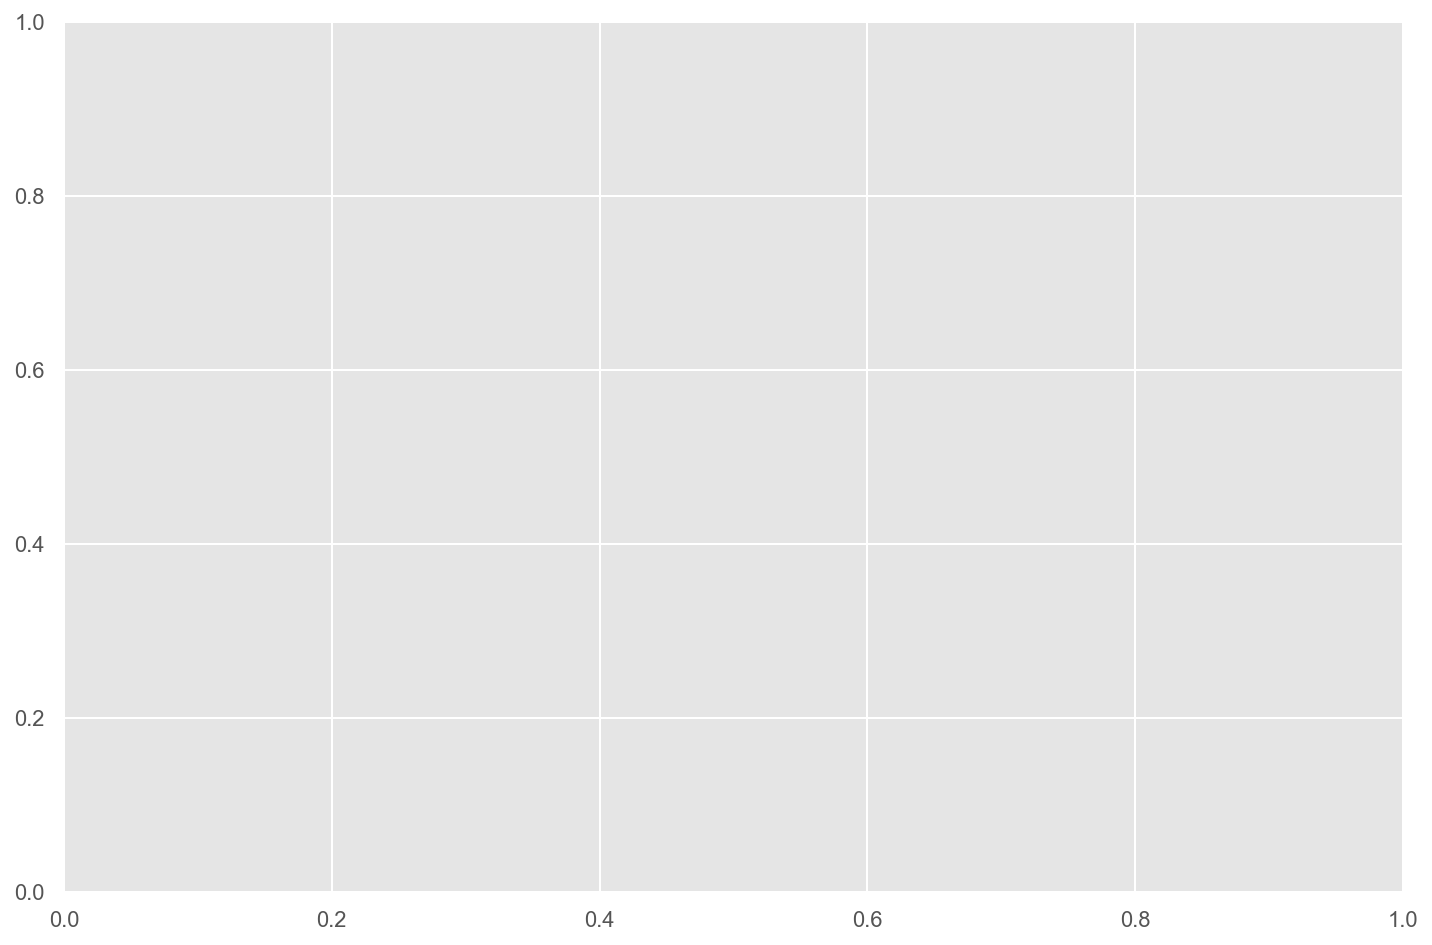

In [335]:
fig, ax = plt.subplots()
iterables = zip(['orange', 'red', 'green'],
                ['no_goals', 'goal_against', 'goal_for'])

axes = []
for c, label in iterables:
    m = df.label==label
#     m = m & (df.season != '20122013')
    df_ = df[m].copy()
    df_.loc[(df.season == '20122013'), label] = 0
    s = df_.groupby('season').size().sort_index(ascending=True).rename(label).reset_index()
    s.plot(marker='o', lw=0, ax=ax, ms=10, color=c, label=label)
    plt.legend()

    
ax = plt.gca()
ax.set_ylim(0, 600)
ax.set_xlim(0, 15)

label_map = {str(i): season for i, season in enumerate(df.season.drop_duplicates().sort_values(ascending=True).tolist())}
xticks = [label_map.get(str(round(tick)), '') for tick in ax.get_xticks().tolist()]
ax.set_xticklabels(xticks)
plt.ylabel('Goalie Pulls')

# savefig('goalie_pull_outcomes_by_season')

Text(0, 0.5, 'Goalie Pulls')

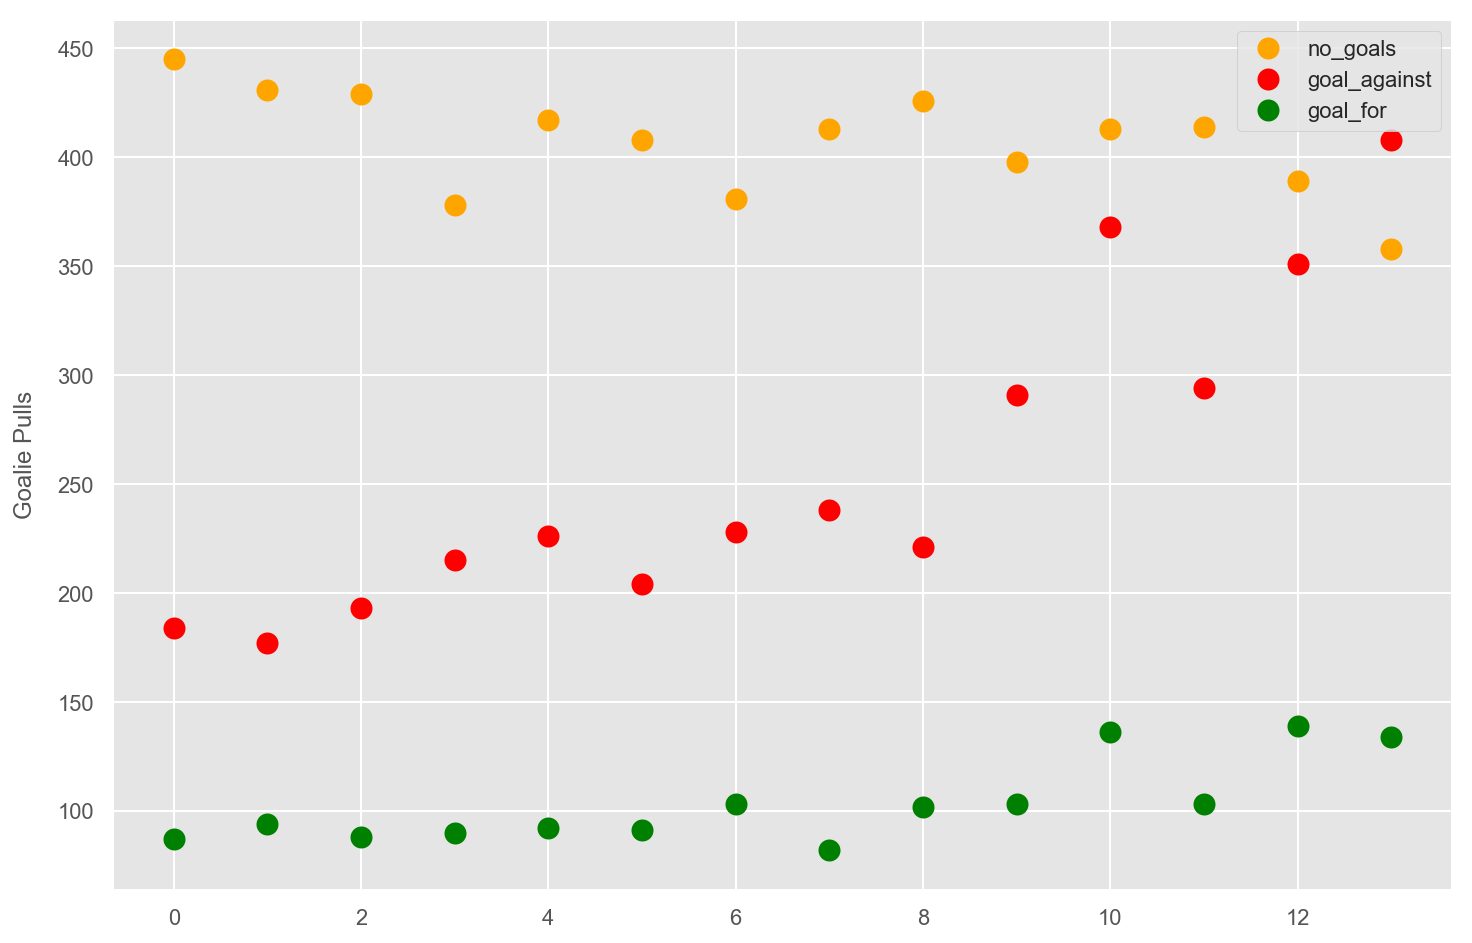

Something is up with 2009, where I don't seem to collect enough data.

The issue is my labels. That should be the 2012/2013 season, which was shortened by a lockout

In [286]:
ax

In [299]:
[t.get_text() for t in ax.get_xticklabels()]

['',
 '20032004',
 '20062007',
 '20082009',
 '20102011',
 '20122013',
 '20142015',
 '20162017',
 '20182019',
 '']

In [298]:
for tick in ax.get_xticklabels():
    tick.set_text(label_map.get(tick.get_text(), ''))

In [290]:
tick = ax.get_xticklabels()[0]

In [293]:
tick.set_text('')

In [296]:
label_map

{'0': '20032004',
 '1': '20052006',
 '2': '20062007',
 '3': '20072008',
 '4': '20082009',
 '5': '20092010',
 '6': '20102011',
 '7': '20112012',
 '8': '20122013',
 '9': '20132014',
 '10': '20142015',
 '11': '20152016',
 '12': '20162017',
 '13': '20172018',
 '14': '20182019'}

In [ ]:
label_map = {str(i): season for i, season in enumerate(df.groupby('season').size().sort_index(ascending=True).index.tolist())}
# xticklabels = [label_map.get(t.get_text(), '') for t in ax.get_xticklabels()]
# ax.set_xticklabels(xticklabels)


# print([t.get_text() for t in ax.get_xticklabels()])

# ticks = [t.get_text() for t in ax.get_xticklabels()]
# ax.set_xticklabels(ticks)


In [ ]:
fig, ax = plt.subplots()
iterables = zip(['orange', 'red', 'green'],
                ['no_goals', 'goal_against', 'goal_for'])

axes = []
for c, label in iterables:
    m = df.label==label
    s = df[m].groupby('season').size().sort_index(ascending=True).rename(label).reset_index()
    axes.append(s.plot(marker='o', lw=0, ax=ax, ms=10, color=c, label=label))
    plt.legend()

ax.set_xticklabels(s.season.tolist());
ax.set_ylim(0, 600)
plt.ylabel('Total Counts')
# savefig('goalie_pull_outcomes_by_season')

['', '', '', '', '', '', '', '', '', '']


Text(0, 0.5, 'Total Counts')

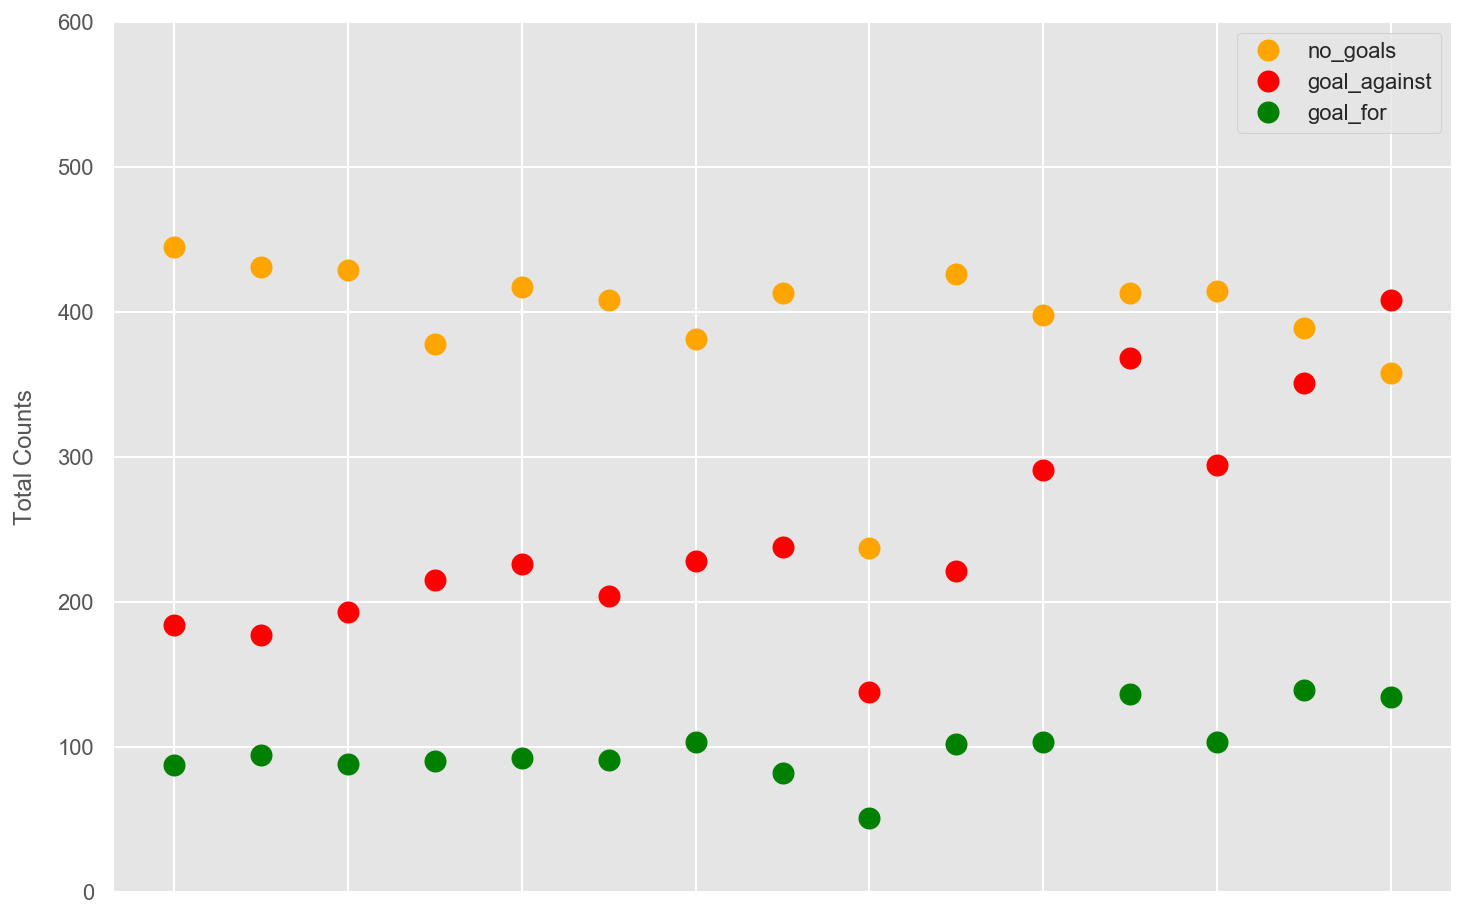

In [284]:
# fig, ax = plt.subplots()
# iterables = zip(['orange', 'red', 'green'],
#                 ['no_goals', 'goal_against', 'goal_for'])

# axes = []
# for c, label in iterables:
#     m = df.label==label
#     s = df[m].groupby('season').size().sort_index(ascending=True).rename(label).reset_index()
#     s.plot(marker='o', lw=0, ax=ax, ms=10, color=c, label=label)
#     plt.legend()



# ax.set_ylim(0, 600)
label_map = {str(i): season for i, season in enumerate(df.groupby('season').size().sort_index(ascending=True).index.tolist())}
# xticklabels = [label_map.get(t.get_text(), '') for t in ax.get_xticklabels()]
# ax.set_xticklabels(xticklabels)


# print([t.get_text() for t in ax.get_xticklabels()])

# ticks = [t.get_text() for t in ax.get_xticklabels()]
# ax.set_xticklabels(ticks)
# plt.ylabel('Total Counts')
# # savefig('goalie_pull_outcomes_by_season')

In [267]:
label_map

{'0': '20032004',
 '1': '20052006',
 '2': '20062007',
 '3': '20072008',
 '4': '20082009',
 '5': '20092010',
 '6': '20102011',
 '7': '20112012',
 '8': '20122013',
 '9': '20132014',
 '10': '20142015',
 '11': '20152016',
 '12': '20162017',
 '13': '20172018',
 '14': '20182019'}

In [273]:
[t.get_text() for t in ax.get_xticklabels()]

['−2', '0', '2', '4', '6', '8', '10', '12', '14', '16']

In [274]:
ax.set_xticklabels([t.get_text() for t in ax.get_xticklabels()])

[Text(-2.0, 0, '−2'),
 Text(0.0, 0, '0'),
 Text(2.0, 0, '2'),
 Text(4.0, 0, '4'),
 Text(6.0, 0, '6'),
 Text(8.0, 0, '8'),
 Text(10.0, 0, '10'),
 Text(12.0, 0, '12'),
 Text(14.0, 0, '14'),
 Text(16.0, 0, '16')]